# Прогнозирование оценки учеников

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [73]:
DATA_FOLDER = "data/"

train_por = pd.read_csv(DATA_FOLDER + "student-por.csv")
train_math = pd.read_csv(DATA_FOLDER + "student-mat.csv")

In [74]:
train_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [75]:
train_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [76]:
for column in train_math.columns:
    print(f'{column}: {train_math[column].unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
age: [18 17 15 16 19 22 20 21]
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 2 1]
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [1 2 5 3 4]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1: [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2: [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3: [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7 

# Исследование данных

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/2054561948.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Гендер : F - девушка,M - мужчина')

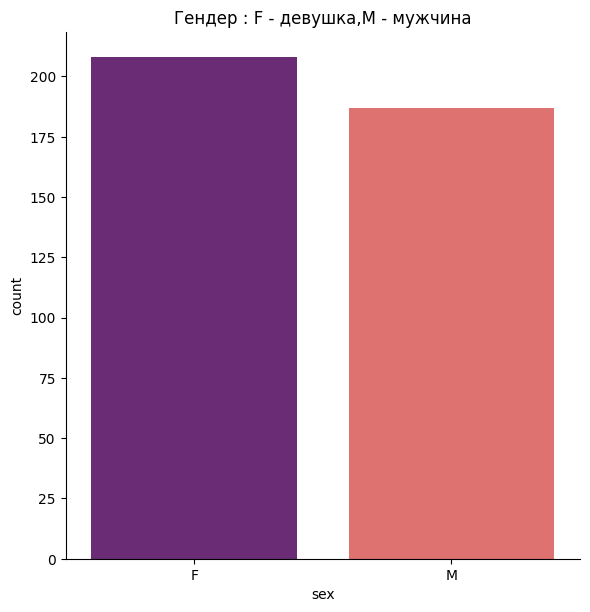

In [77]:
sns.catplot(x="sex", kind="count",palette="magma", data=train_math, height = 6)
plt.title("Гендер : F - девушка,M - мужчина")

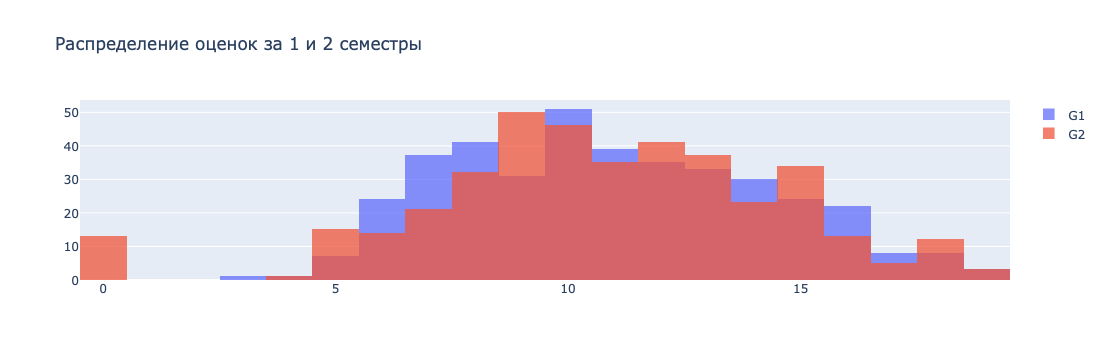

In [78]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=train_math['G1'], name="G1"))
fig.add_trace(go.Histogram(x=train_math['G2'], name="G2"))


fig.update_layout(barmode='overlay')

fig.update_layout(title_text='Распределение оценок за 1 и 2 семестры')

fig.update_traces(opacity=0.75)
fig.show()

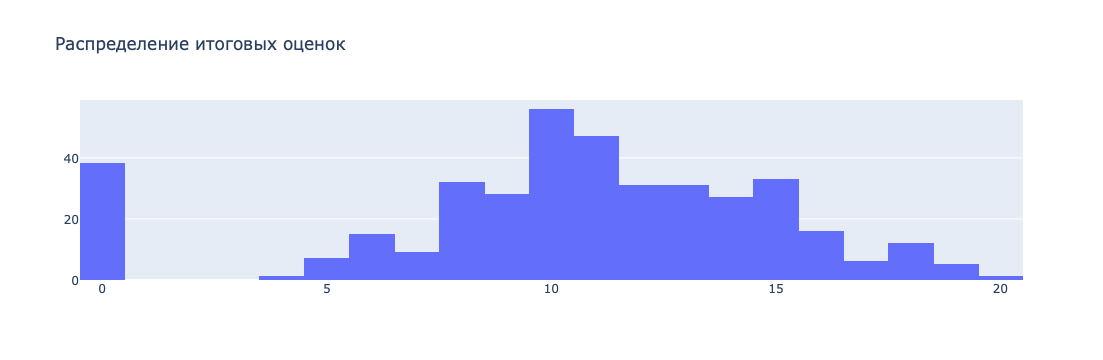

In [79]:
fig = go.Figure(data=[go.Histogram(x=train_math['G3'])])

fig.update_layout(title_text='Распределение итоговых оценок')

fig.show()

Как видно из графика, есть целых 38 учеников с финальной оценкой равной 0. Скорее всего это люди, которые были исключены в предыдущих семестрах или ушли по другим причинам.

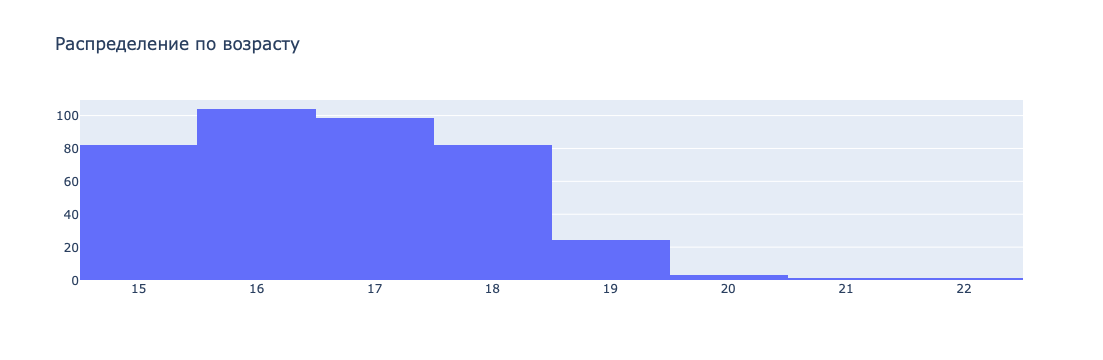

In [80]:
fig = go.Figure(data=[go.Histogram(x=train_math['age'])])

fig.update_layout(title_text='Распределение по возрасту')

fig.show()

## Влияние образования родителей на успеваемость учеников

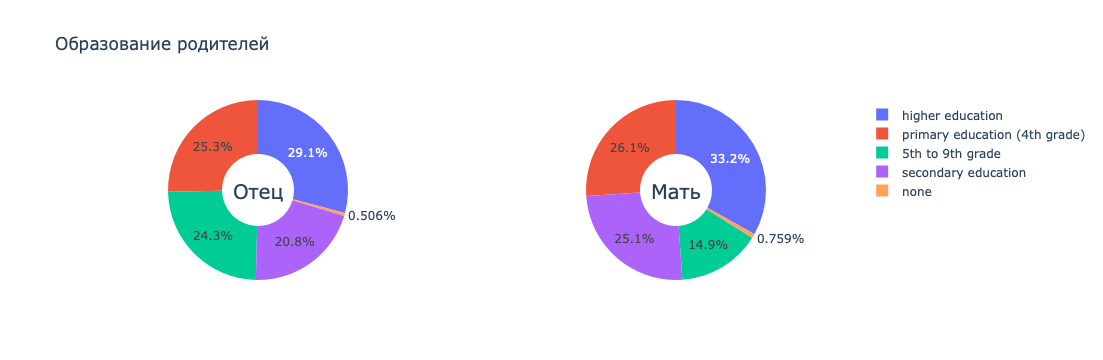

In [81]:
F_edu = train_math[["Fedu", "G3"]].copy()
M_edu = train_math[["Medu", "G3"]].copy()
replace = {0: "none", 1: "primary education (4th grade)", 2: "5th to 9th grade",
           3: "secondary education", 4: "higher education"}

F_edu["Fedu"] = F_edu["Fedu"].replace(replace)
M_edu["Medu"] = M_edu["Medu"].replace(replace)


labels_F = F_edu["Fedu"].unique().tolist()
counts_F = F_edu["Fedu"].value_counts().tolist()

labels_M = M_edu["Medu"].unique().tolist()
counts_M = M_edu["Medu"].value_counts().tolist()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels_F, values=counts_F, name="Обр. отца", scalegroup="one"),
              1, 1)
fig.add_trace(go.Pie(labels=labels_M, values=counts_M, name="Обр. матери", scalegroup="one"),
              1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text='Образование родителей',
                 annotations=[dict(text='Отец', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Mать', x=0.81, y=0.5, font_size=20, showarrow=False)])

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/4245619452.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/4245619452.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от образования родителей (Мать)'}, xlabel='G3', ylabel='Medu'>

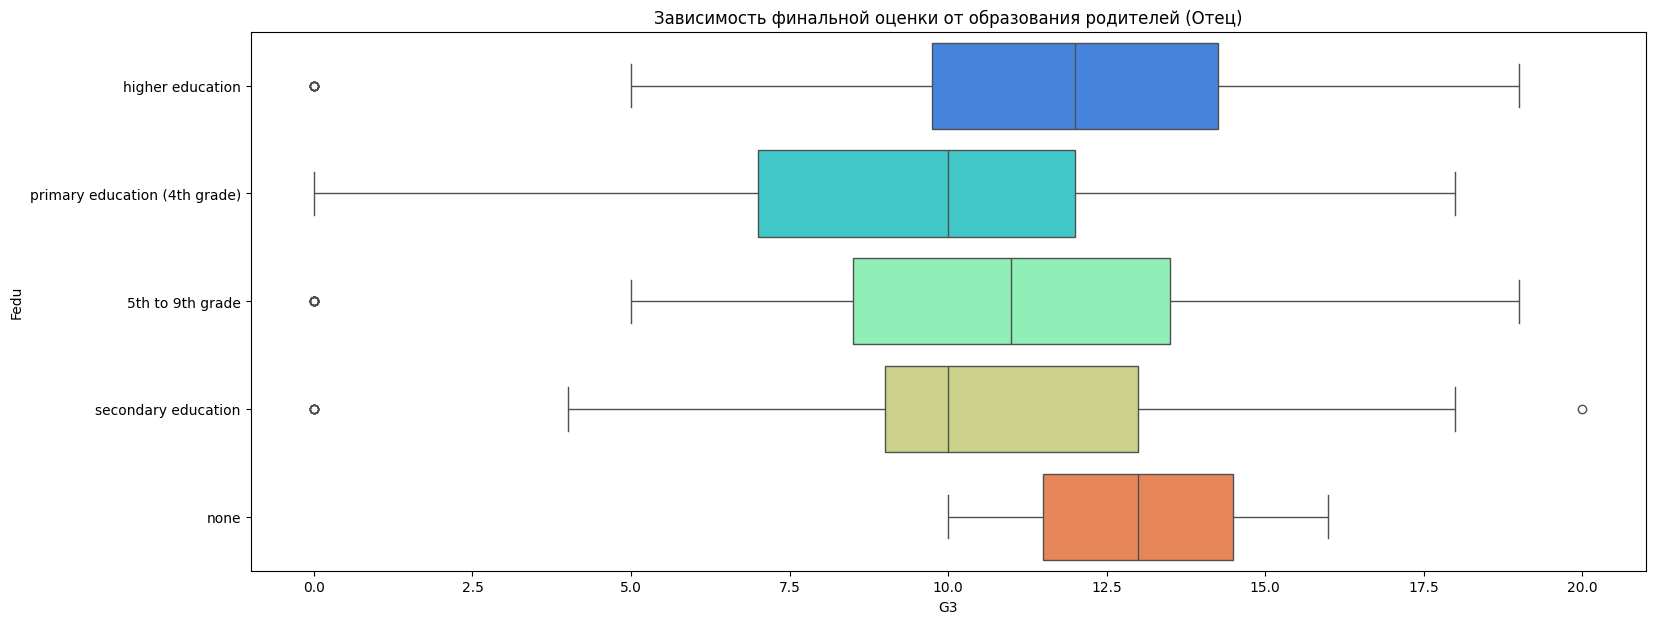

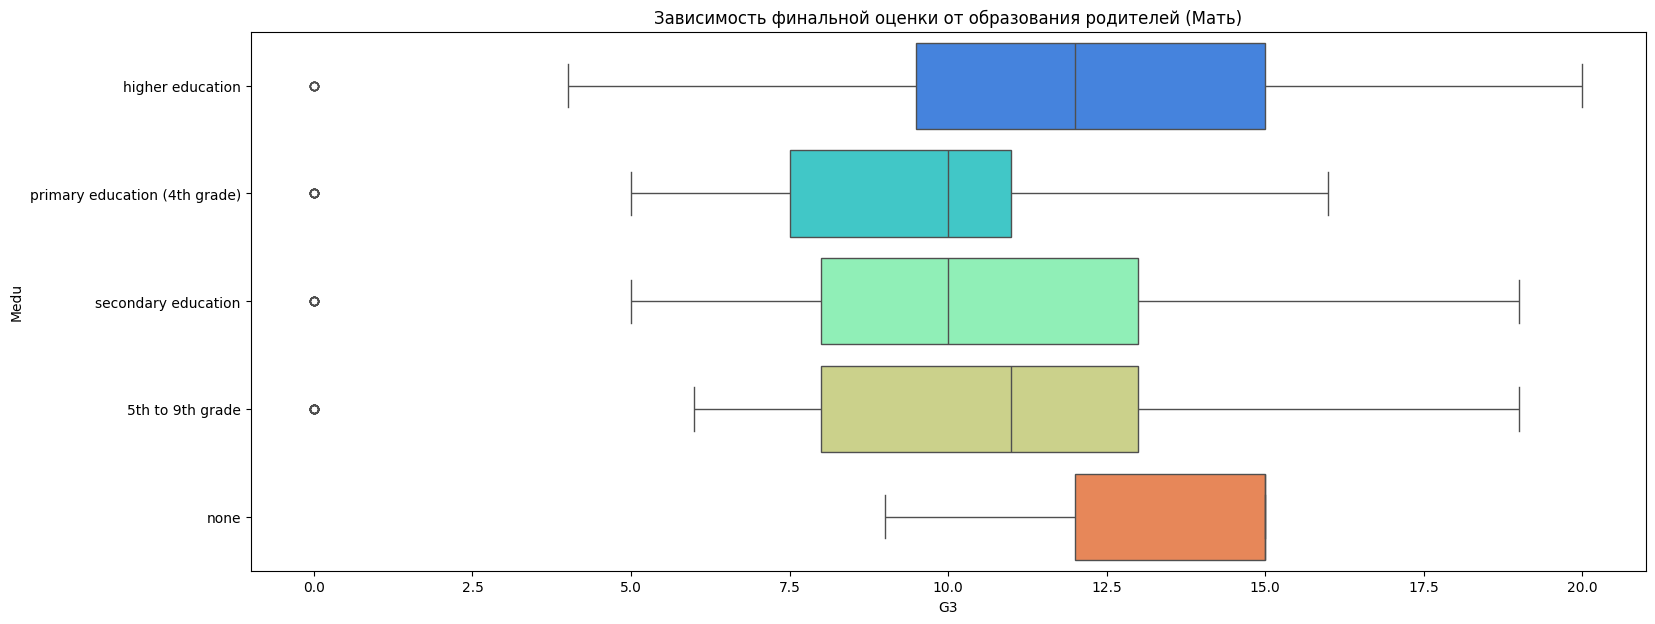

In [82]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от образования родителей (Отец)")
sns.boxplot(y="Fedu", x="G3", data = F_edu , orient="h", palette = 'rainbow')

plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от образования родителей (Мать)")
sns.boxplot(y="Medu", x="G3", data = M_edu , orient="h", palette = 'rainbow')

Интересно, что у родителей без образования дети получают самые высоки оценки, из-за малого количества данных такого рода это можно посчитать выбросом.У родителей с высшим образованием дети имеют лучшие оценки, чем другие.

## Влияние места работы родителей на успеваемость учеников

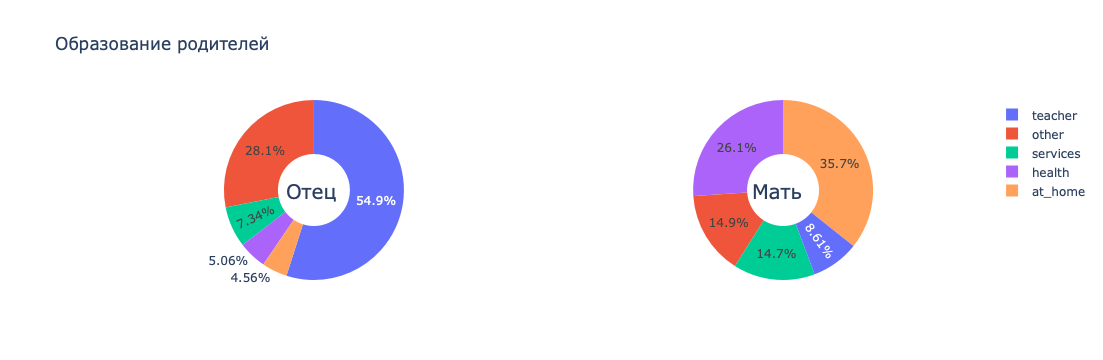

In [83]:
labels_F = train_math["Fjob"].unique().tolist()
counts_F = train_math["Fjob"].value_counts().tolist()

labels_M = train_math["Mjob"].unique().tolist()
counts_M = train_math["Mjob"].value_counts().tolist()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels_F, values=counts_F, name="Раб. отца", scalegroup="one"),
              1, 1)
fig.add_trace(go.Pie(labels=labels_M, values=counts_M, name="Раб. матери", scalegroup="one"),
              1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text='Образование родителей',
                 annotations=[dict(text='Отец', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Mать', x=0.80, y=0.5, font_size=20, showarrow=False)])

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/2885798614.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/2885798614.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от работы родителей (Мать)'}, xlabel='G3', ylabel='Mjob'>

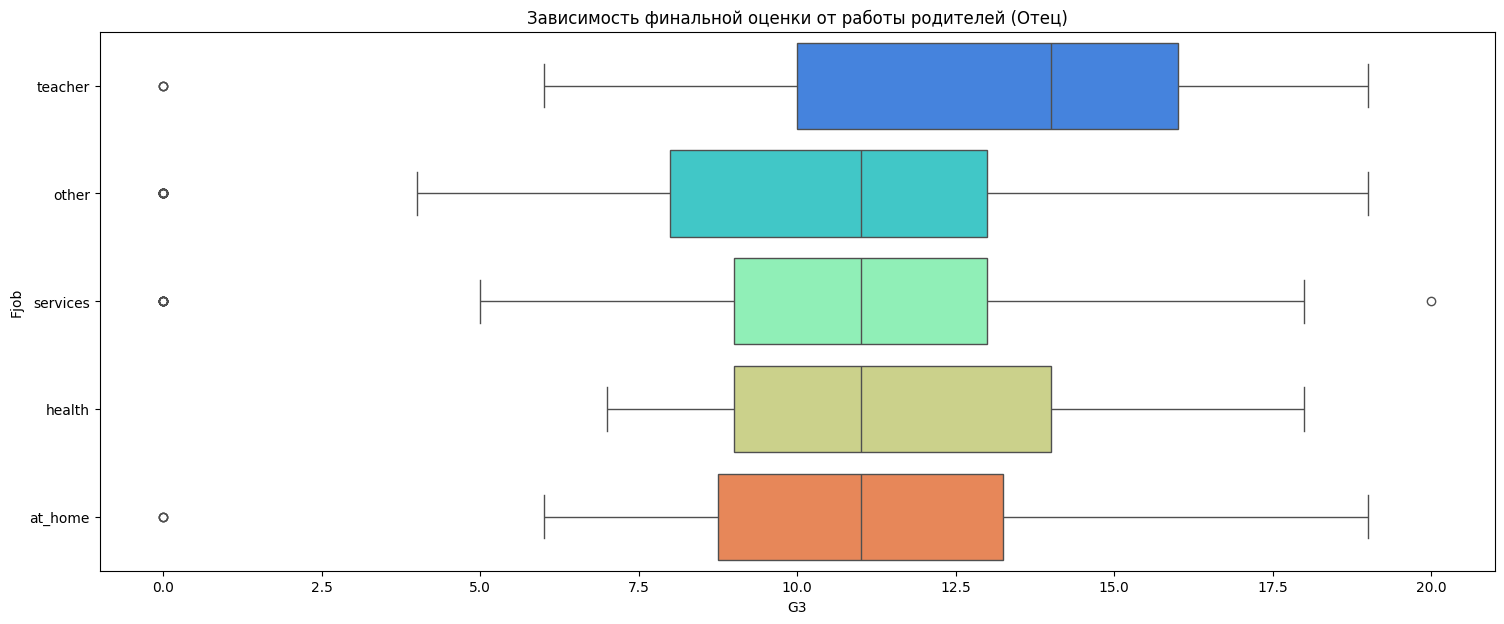

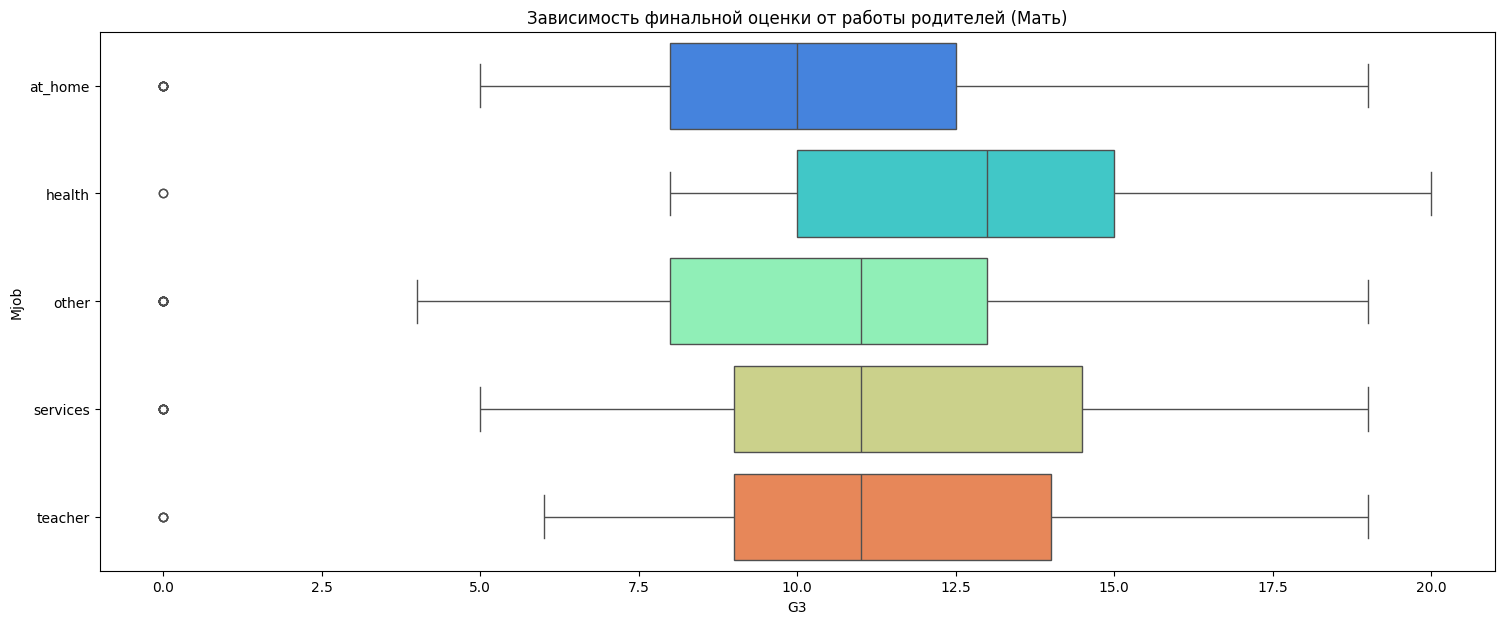

In [84]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от работы родителей (Отец)")
sns.boxplot(y="Fjob", x="G3", data = train_math, orient="h", palette = 'rainbow')

plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от работы родителей (Мать)")
sns.boxplot(y="Mjob", x="G3", data = train_math, orient="h", palette = 'rainbow')

Интересно, что в наших данных такое большое количество отцов работает учителями.

## Влияние отношений внутри семьи на успеваемость ученика

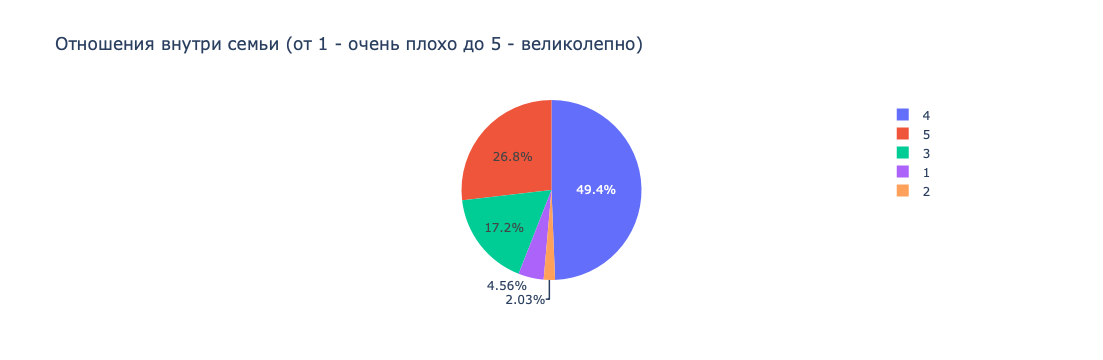

In [85]:
labels = train_math["famrel"].unique().tolist()
counts = train_math["famrel"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Отношения внутри семьи (от 1 - очень плохо до 5 - великолепно)')

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/2735795006.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от отношений внутри семьи'}, xlabel='G3', ylabel='famrel'>

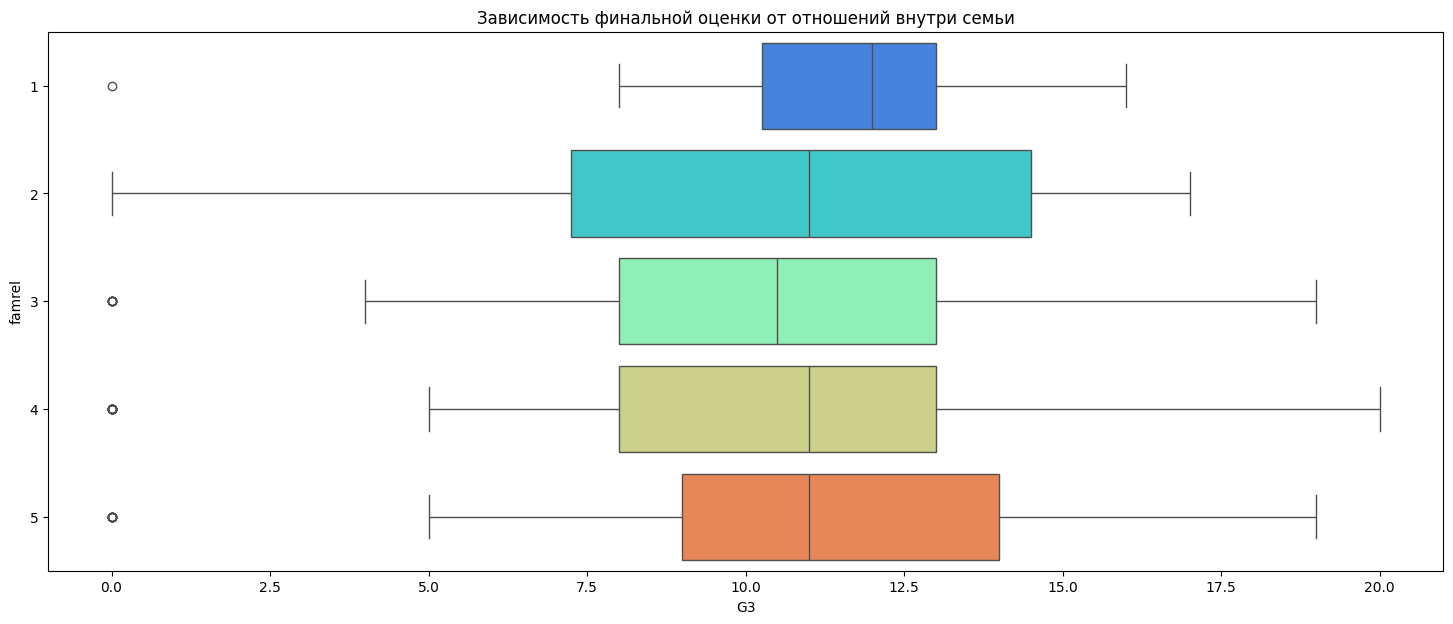

In [86]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от отношений внутри семьи")
sns.boxplot(y="famrel", x="G3", data = train_math , orient="h", palette = 'rainbow')

## Влияние времени проведенного за учебой на успеваемость и здоровье

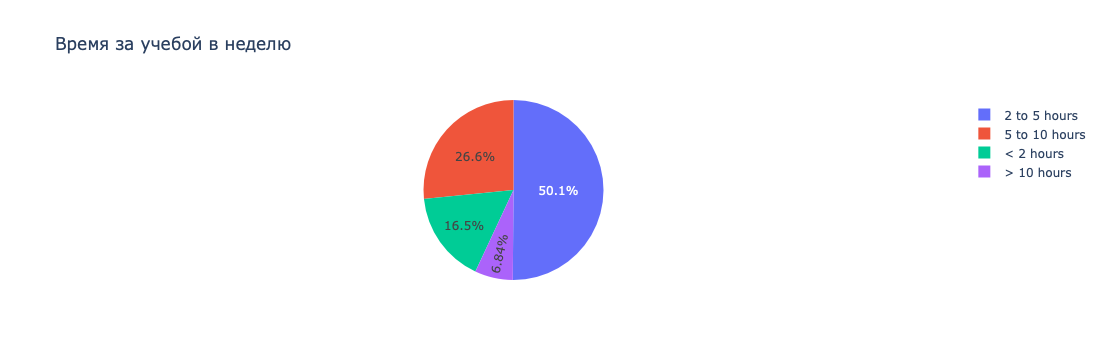

In [87]:
study_time = train_math[["studytime", "G3", "health"]].copy()
replace = {1: "< 2 hours", 2: "2 to 5 hours",
           3: "5 to 10 hours", 4: "> 10 hours"}

study_time["studytime"] = study_time["studytime"].replace(replace)


labels = study_time["studytime"].unique().tolist()
counts = study_time["studytime"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Время за учебой в неделю')

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/687599592.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от времени за учебой'}, xlabel='G3', ylabel='studytime'>

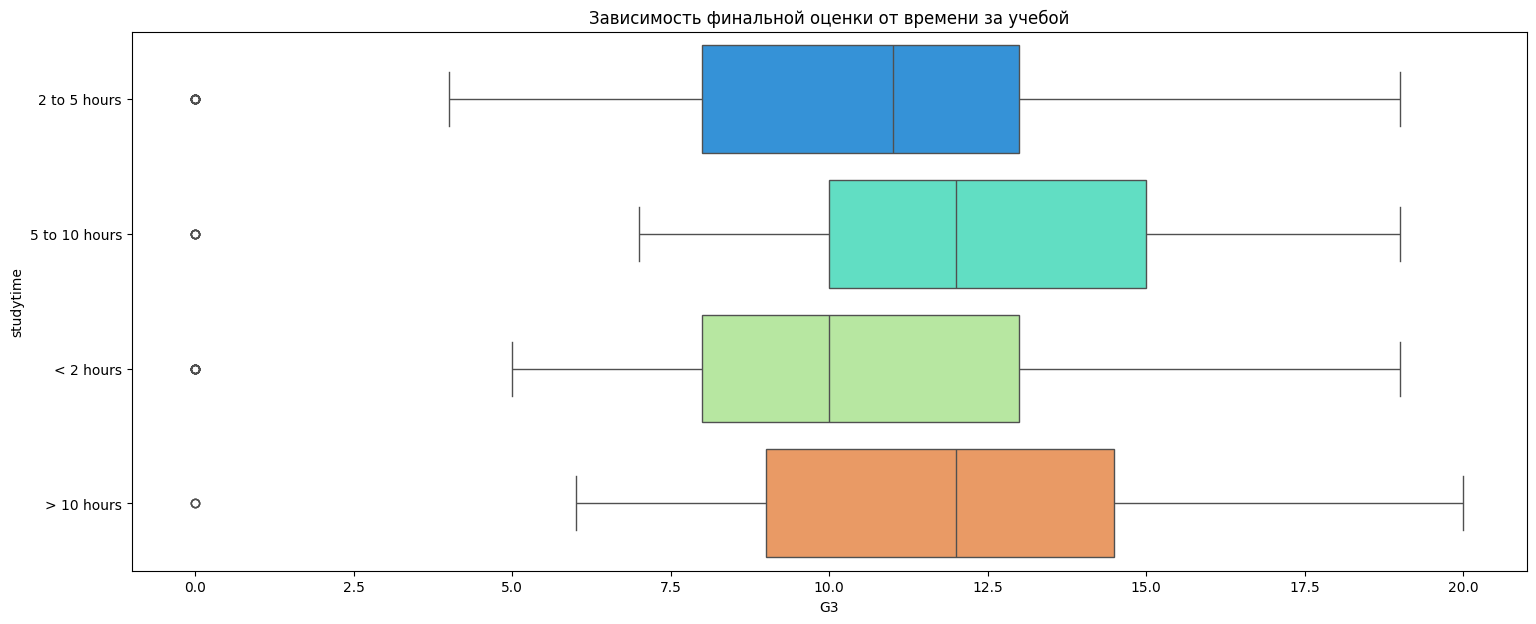

In [88]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от времени за учебой")
sns.boxplot(y="studytime", x="G3", data = study_time , orient="h", palette = 'rainbow')

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/3360649580.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость здоровья от времени за учебой'}, xlabel='health', ylabel='studytime'>

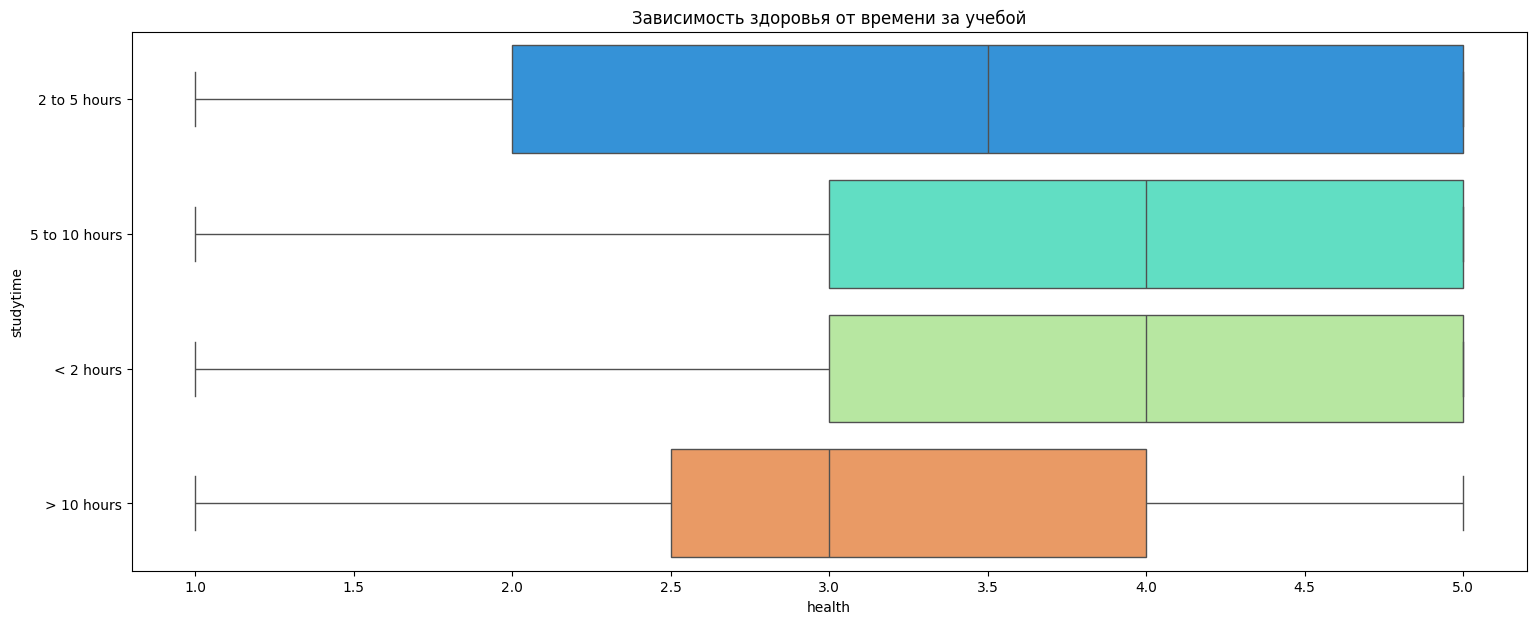

In [89]:
plt.figure(figsize=(18,7))
plt.title("Зависимость здоровья от времени за учебой")
sns.boxplot(y="studytime", x="health", data = study_time , orient="h", palette = 'rainbow')

Очевидно, что время, уделенное учеником сильно влияет на итоговую оценку. Но на графике видно, что разница между 5-10 часами и больше чем 10 часов не велика, 5-10 часов даже немного превосходит. Отсюда можно сделать вывод, что учиться много полезно, но если переусердствовать, то это не скажется хорошо на учебе и на здоровье.

## Влияние здоровья на учпеваемось учеников

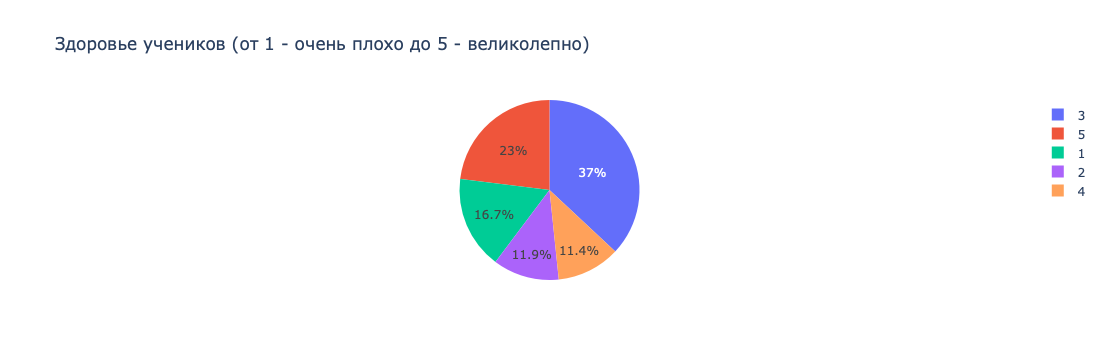

In [90]:
health = train_math[["health", "G3"]].copy()



labels = health["health"].unique().tolist()
counts = health["health"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Здоровье учеников (от 1 - очень плохо до 5 - великолепно)')

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/2210536045.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от времени за учебой'}, xlabel='G3', ylabel='health'>

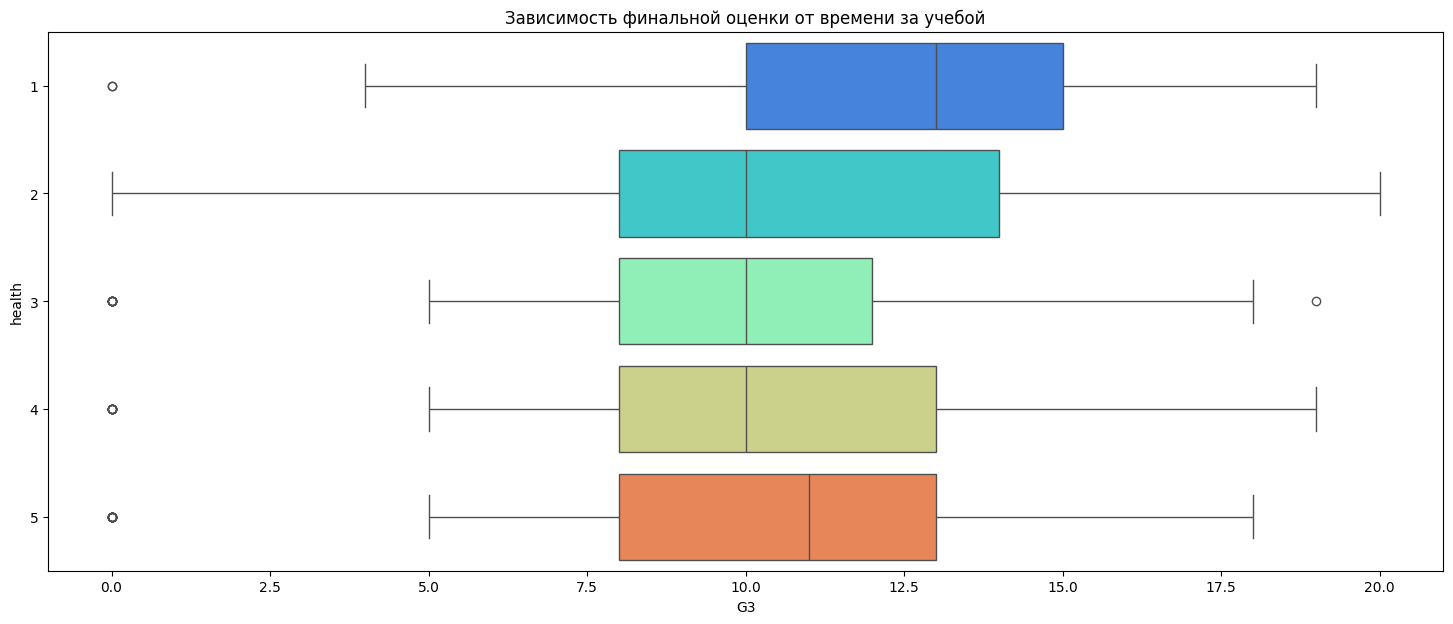

In [91]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от времени за учебой")
sns.boxplot(y="health", x="G3", data = study_time , orient="h", palette = 'rainbow')

На графике видно, что в погоне за оценками ученики жертвуют здоровьем. Но также видно, что у тех ребят, кто следит за своим здоровьем оценки в среднем лучше.

## Влияние употребления алкоголя на успеваемость ученика (математики)

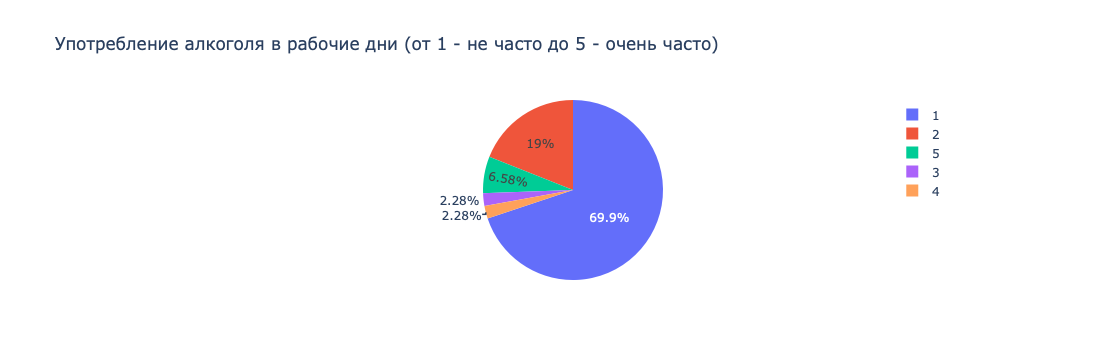

In [92]:
d_alco = train_math[["Dalc", "G3"]].copy()


labels = d_alco["Dalc"].unique().tolist()
counts = d_alco["Dalc"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Употребление алкоголя в рабочие дни (от 1 - не часто до 5 - очень часто)')

fig.show()

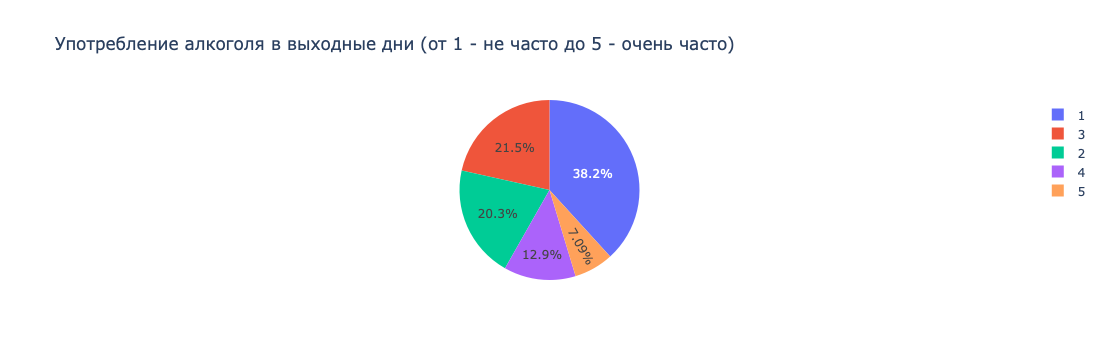

In [93]:
w_alco = train_math[["Walc", "G3"]].copy()

labels = w_alco["Walc"].unique().tolist()
counts = w_alco["Walc"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Употребление алкоголя в выходные дни (от 1 - не часто до 5 - очень часто)')

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/105045947.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/105045947.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от употребления алкоголя в выходные дни'}, xlabel='G3', ylabel='Walc'>

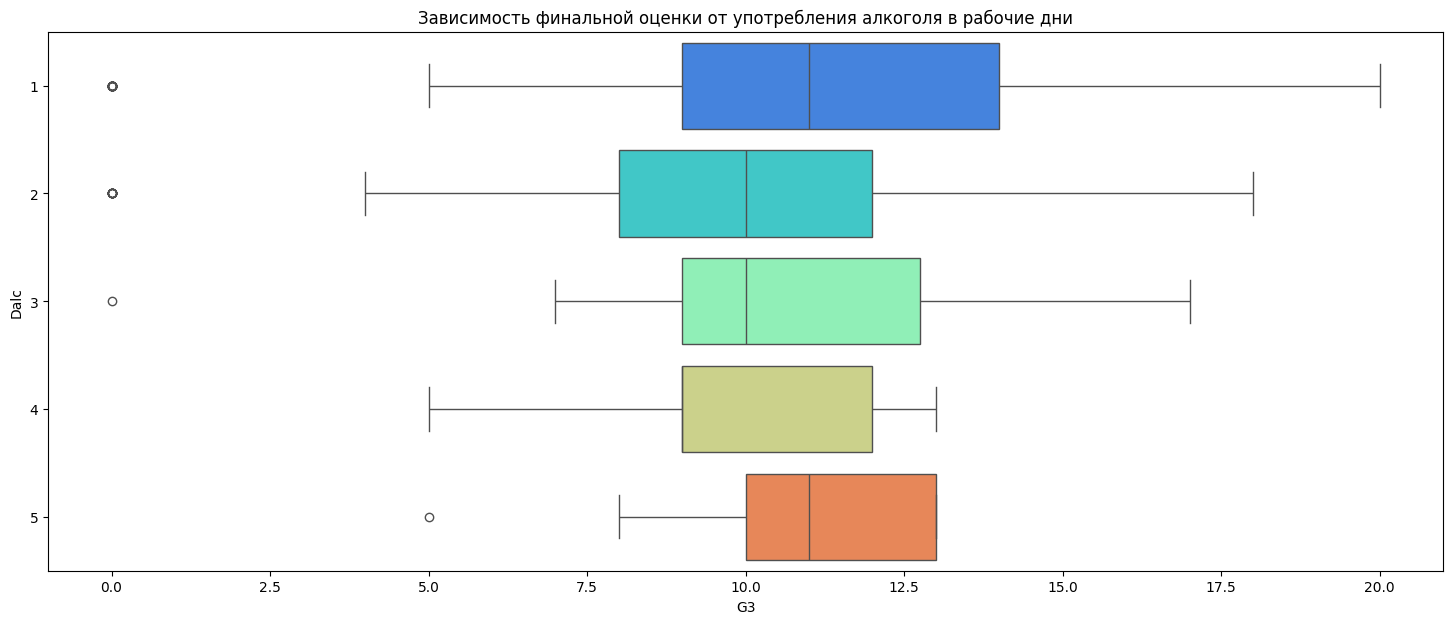

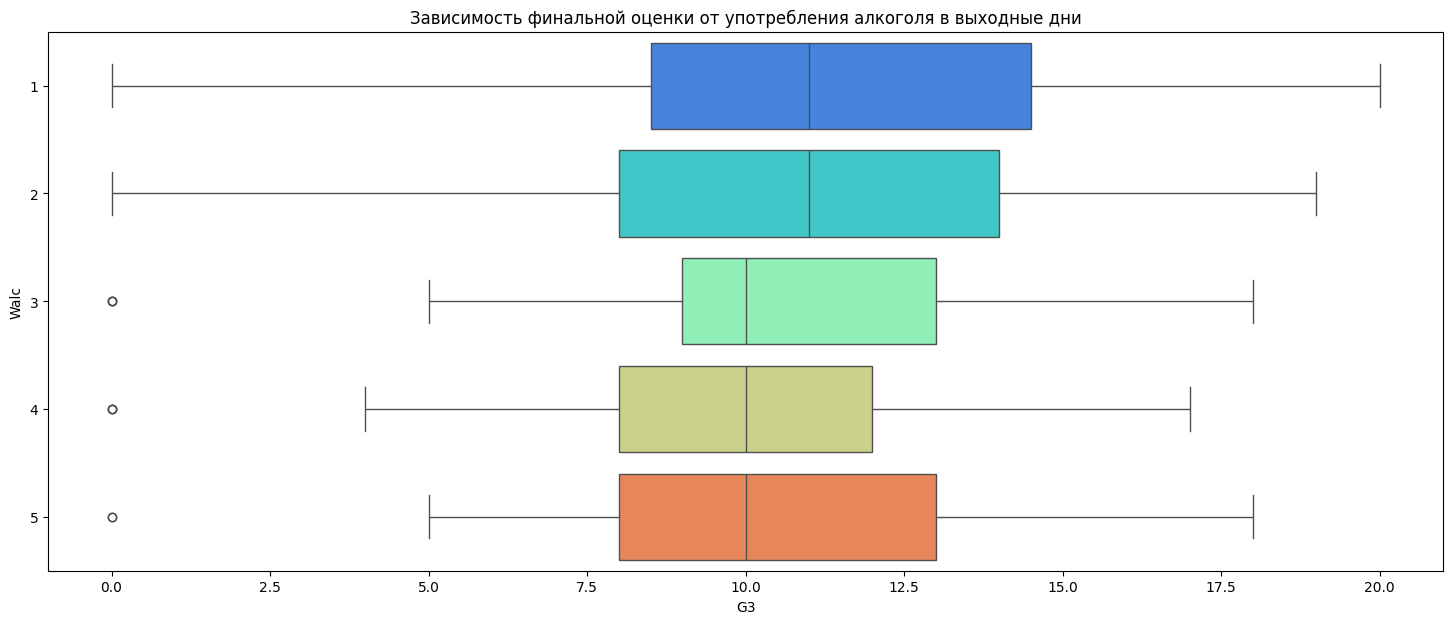

In [94]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от употребления алкоголя в рабочие дни")
sns.boxplot(y="Dalc", x="G3", data = d_alco, orient="h", palette = 'rainbow')

plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от употребления алкоголя в выходные дни")
sns.boxplot(y="Walc", x="G3", data = w_alco, orient="h", palette = 'rainbow')

Как видно из графиков выше, в рабочие дни большинство учеников употребляют алкоголь очень редко, хотя в выходные дни картина несколько отличается. Также видно, что чем реже ученик употребляет алкоголь, тем выше его итоговая оценка.

## Влияние употребления алкоголя на успеваемость ученика (португальский)

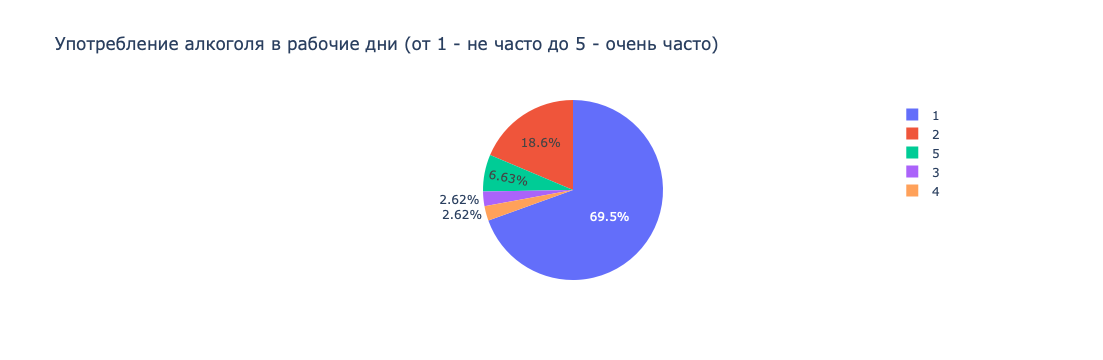

In [95]:
d_alco = train_por[["Dalc", "G3"]].copy()


labels = d_alco["Dalc"].unique().tolist()
counts = d_alco["Dalc"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Употребление алкоголя в рабочие дни (от 1 - не часто до 5 - очень часто)')

fig.show()

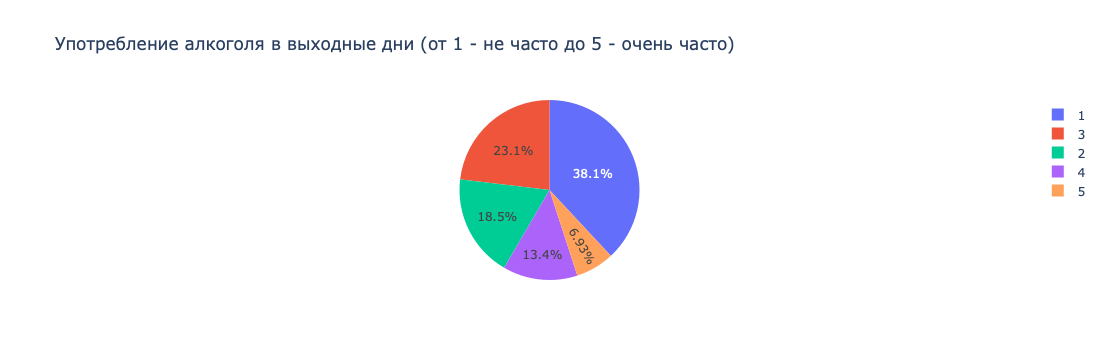

In [96]:
w_alco = train_por[["Walc", "G3"]].copy()

labels = w_alco["Walc"].unique().tolist()
counts = w_alco["Walc"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Употребление алкоголя в выходные дни (от 1 - не часто до 5 - очень часто)')

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/105045947.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_58936/105045947.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от употребления алкоголя в выходные дни'}, xlabel='G3', ylabel='Walc'>

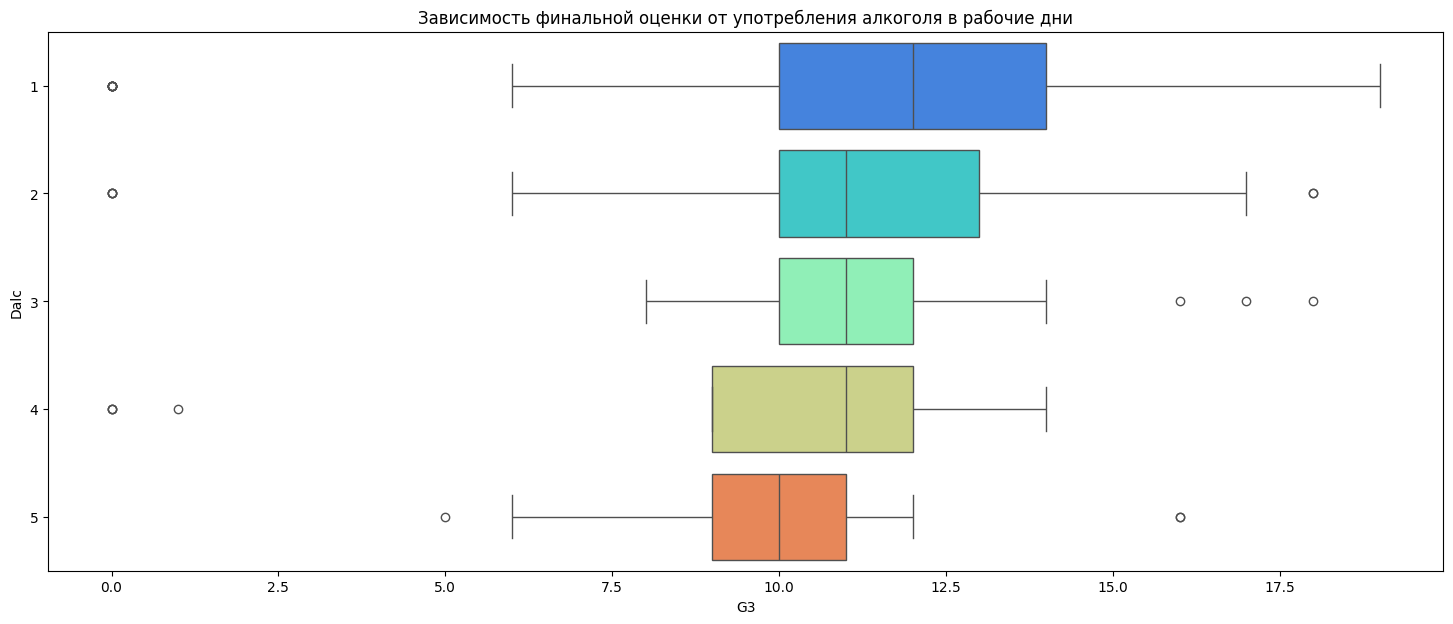

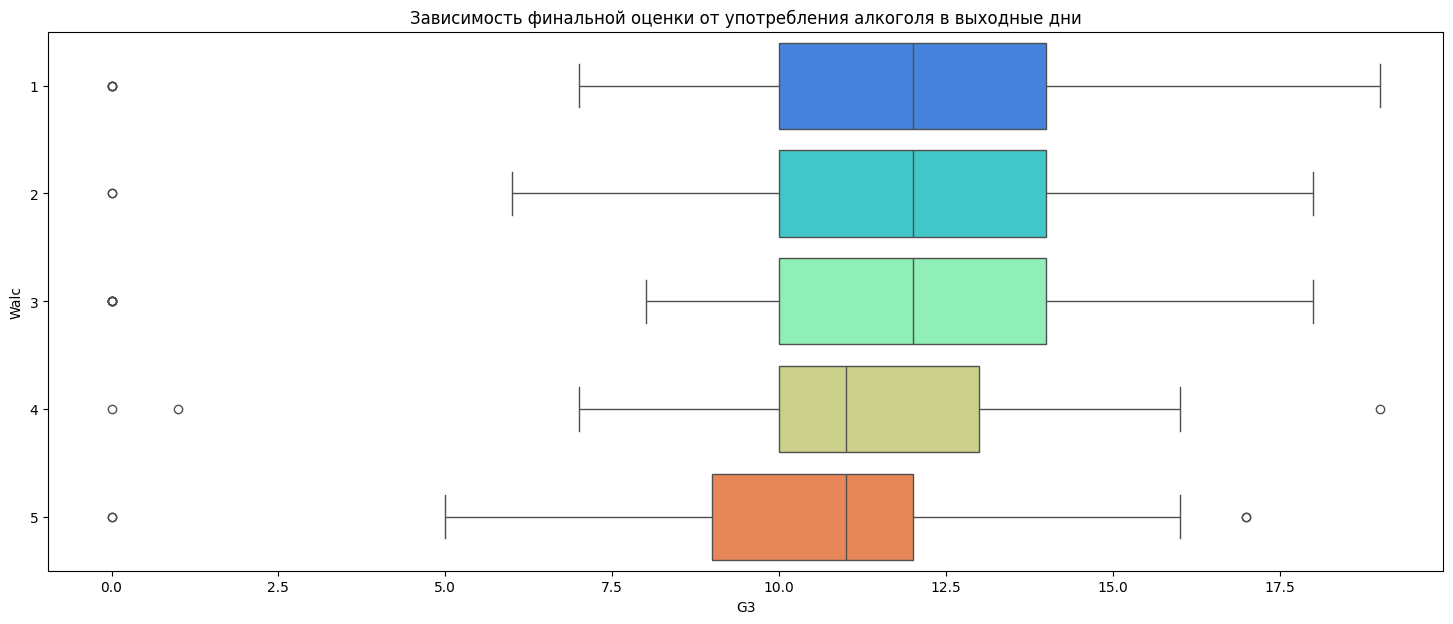

In [97]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от употребления алкоголя в рабочие дни")
sns.boxplot(y="Dalc", x="G3", data = d_alco, orient="h", palette = 'rainbow')

plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от употребления алкоголя в выходные дни")
sns.boxplot(y="Walc", x="G3", data = w_alco, orient="h", palette = 'rainbow')

## Зависимость успеваемости от количества пропусков

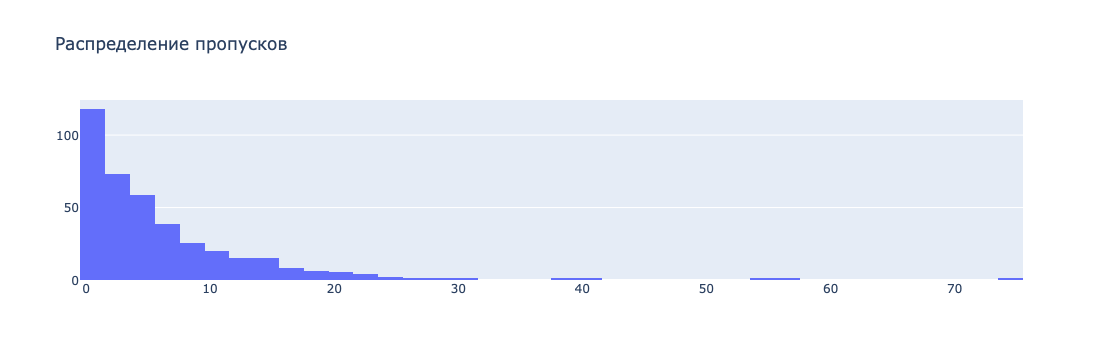

In [98]:
fig = go.Figure(data=[go.Histogram(x=train_math['absences'])])

fig.update_layout(title_text='Распределение пропусков')
fig.show()

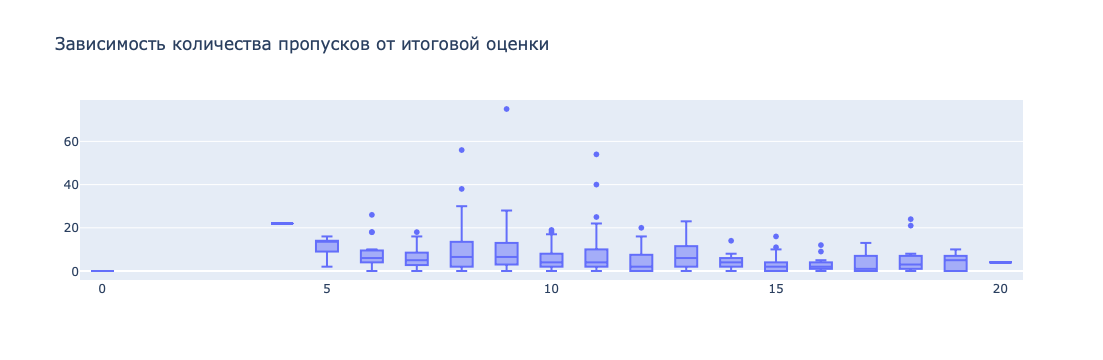

In [99]:
fig = go.Figure(data=[go.Box(x=train_math['G3'], y=train_math['absences'])])

fig.update_layout(title_text='Зависимость количества пропусков от итоговой оценки')

fig.show()

In [100]:
train_math[train_math['G3'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


**Вывод**<br>
Во время учебы в выходные и в будние дни лучше не употреблять алкоголь, если вы хотите получить оценку как можно лучше. Также занятие спортом, учеба 5-10 часов в неделю и как можно частое посещение занятий приблизят вас к высокой отметке.

# Преобразование признаков

In [101]:
data = pd.read_csv(DATA_FOLDER + "student-por.csv")

def get_less_variative_columns(data, treshold=96):
    columns = []
    for column in data.columns:
        counts = data[column].value_counts()
        most_popular_count = counts.iloc[0]
        if (most_popular_count / len(data) * 100 >= treshold):
            columns.append(column)
    return columns
        
get_less_variative_columns(data)

[]

В нашем датасете нет колонок с достаточно низкой вариативностью

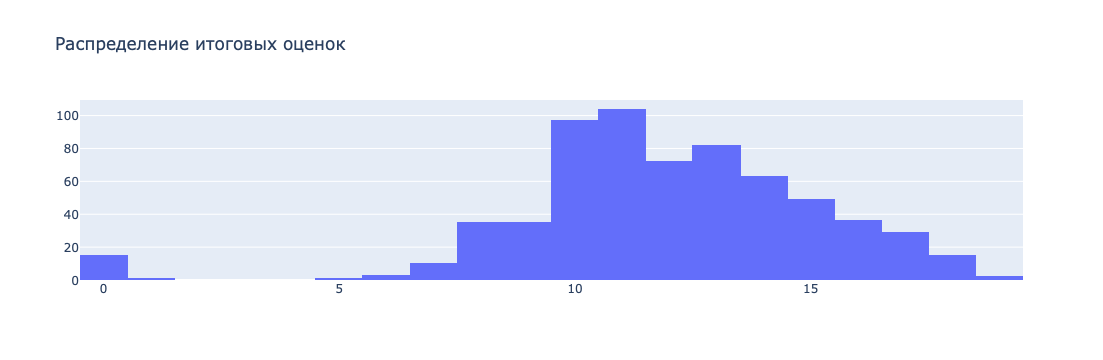

In [102]:
fig = go.Figure(data=[go.Histogram(x=data['G3'])])

fig.update_layout(title_text='Распределение итоговых оценок')

fig.show()

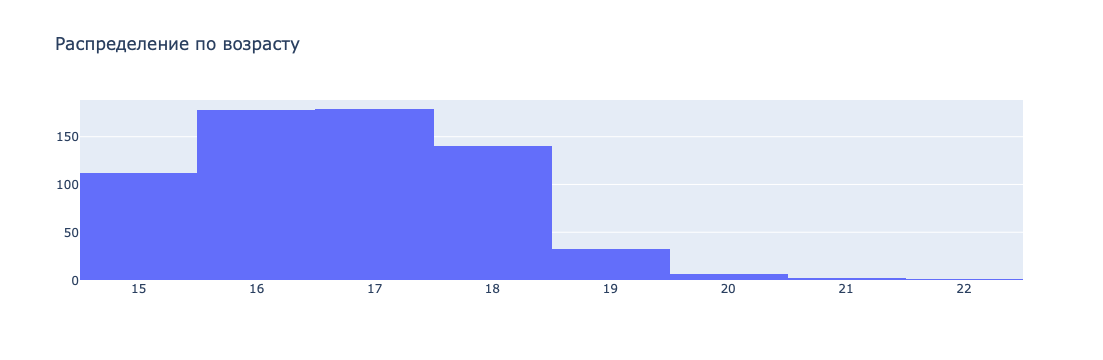

In [103]:
fig = go.Figure(data=[go.Histogram(x=data['age'])])

fig.update_layout(title_text='Распределение по возрасту')

fig.show()

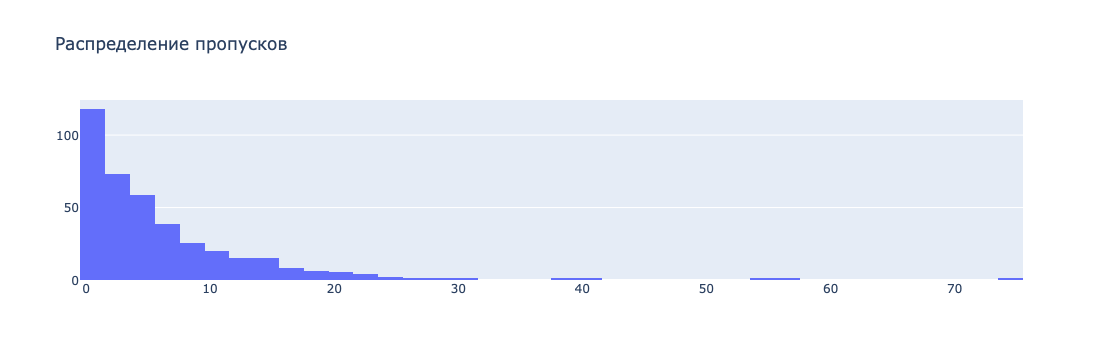

In [104]:
fig = go.Figure(data=[go.Histogram(x=train_math['absences'])])

fig.update_layout(title_text='Распределение пропусков')
fig.show()

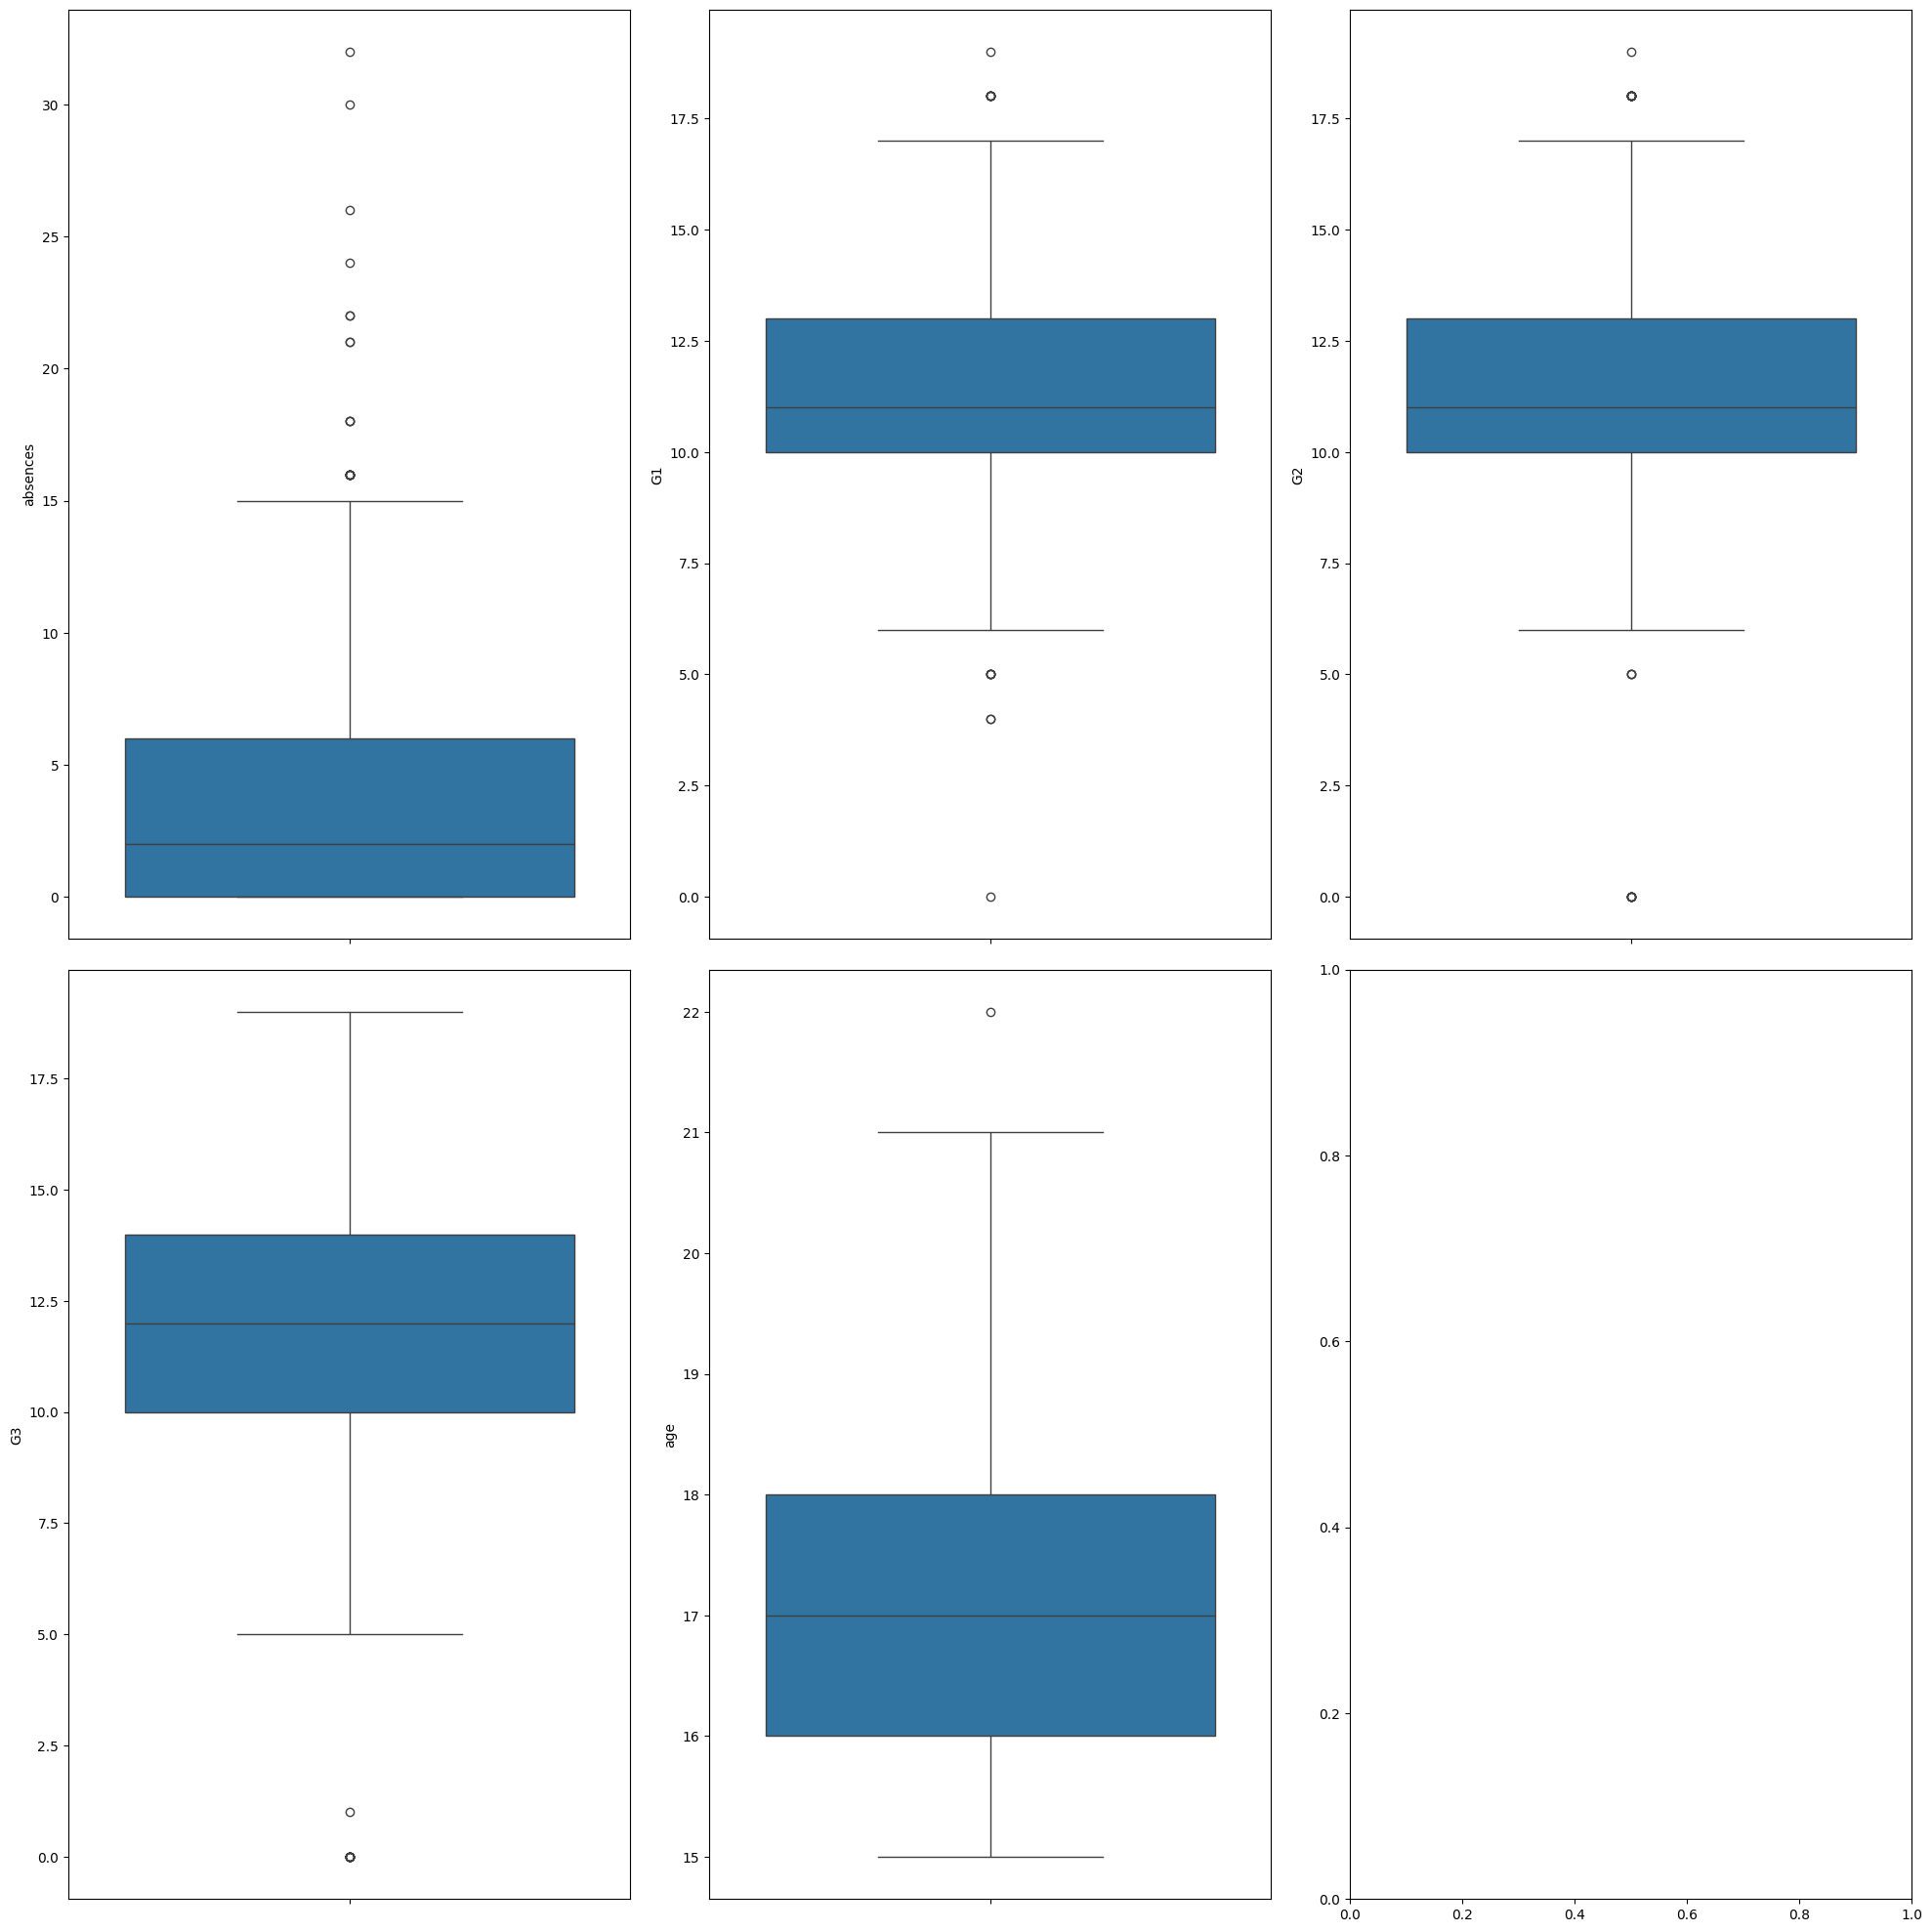

In [105]:
columns = ['absences', 'G1', 'G2', 'G3', 'age']

fig, axes = plt.subplots(round(len(columns)/3), 3, figsize=(20, 20))

y = 0
for col in columns:
    i, j = divmod(y, 3)
    sns.boxplot(y=data[col], data=data, ax=axes[i, j])
    y += 1
fig.tight_layout(pad=1.5)

In [106]:
abs_tres = 18
age_tres = 20

#data = data.drop(data[data['absences'] > abs_tres].index)
data = data.drop(data[data['age'] > age_tres].index)

In [107]:
#data = data.drop(data[data['G3'] <= 1].index)

In [108]:
def get_mark(i):
    if 0 <= i <= 4:
        return 1
    elif 5 <= i <= 8:
        return 2
    elif 9 <= i <= 12:
        return 3
    elif 13 <= i <= 16:
        return 4
    elif 17 <= i <= 20:
        return 5

data["G3"] = data["G3"].apply(get_mark)

Для колонок с ответом yes/no заменим их на 1/0

In [109]:
def yes_no_to_bool(ans):
    if ans == 'yes':
        return 1
    else:
        return 0
    
columns_to_apply = ['schoolsup', 'famsup', 'paid', 'activities',
                   'nursery', 'higher', 'internet', 'romantic']

for column in columns_to_apply:
    data[column] = data[column].apply(yes_no_to_bool)

In [110]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['school', 'sex', 'address', 'famsize',
                    'Pstatus', 'Mjob', 'Fjob', 'reason',
                    'guardian']

for column in columns_to_encode:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

In [111]:
for column in data.columns:
    print(f'{column}: {data[column].unique()}')

school: [0 1]
sex: [0 1]
age: [18 17 15 16 19 20]
address: [1 0]
famsize: [0 1]
Pstatus: [0 1]
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
Mjob: [0 1 2 3 4]
Fjob: [4 2 3 1 0]
reason: [0 2 1 3]
guardian: [1 0 2]
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 1 2]
schoolsup: [1 0]
famsup: [0 1]
paid: [0 1]
activities: [0 1]
nursery: [1 0]
higher: [1 0]
internet: [0 1]
romantic: [0 1]
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [1 2 5 3 4]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
G1: [ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
G2: [11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]
G3: [3 4 5 2 1]


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 [Text(0, 0.5, 'school'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'age'),
  Text(0, 3.5, 'address'),
  Text(0, 4.5, 'famsize'),
  Text(0, 5.5, 'Pstatus'),
  Text(0, 6.5, 'Medu'),
  Text(0, 7.5, 'Fedu'),
  Text(0, 8.5, 'Mjob'),
  Text(0, 9.5, 'Fjob'),
  Text(0, 10.5, 'reason'),
  Text(0, 11.5, 'guardian'),
  Text(0, 12.5, 'traveltime'),
  Text(0, 13.5, 'studytime'),
  Text(0, 14.5, 'failures'),
  Text(0, 15.5, 'schoolsup'),
  Text(0, 16.5, 'famsup'),
  Text(0, 17.5, 'paid'),
  Text(0, 18.5, 'activities'),
  Text(0, 19.5, 'nursery'),
  Text(0, 20.5, 'higher'),
  Text(0, 21.5, 'internet'),
  Text(0, 22.5, 'romantic'),
  Text(0, 23.5, 'famrel'),
  Text(0, 24.5, 'freetime'),
  Text(0, 25.5, 'goout'),
  Text(0, 26.5, 'Dalc'),
  Text(0, 27.5, 'Walc'),
  Text(0, 28.5, 'health

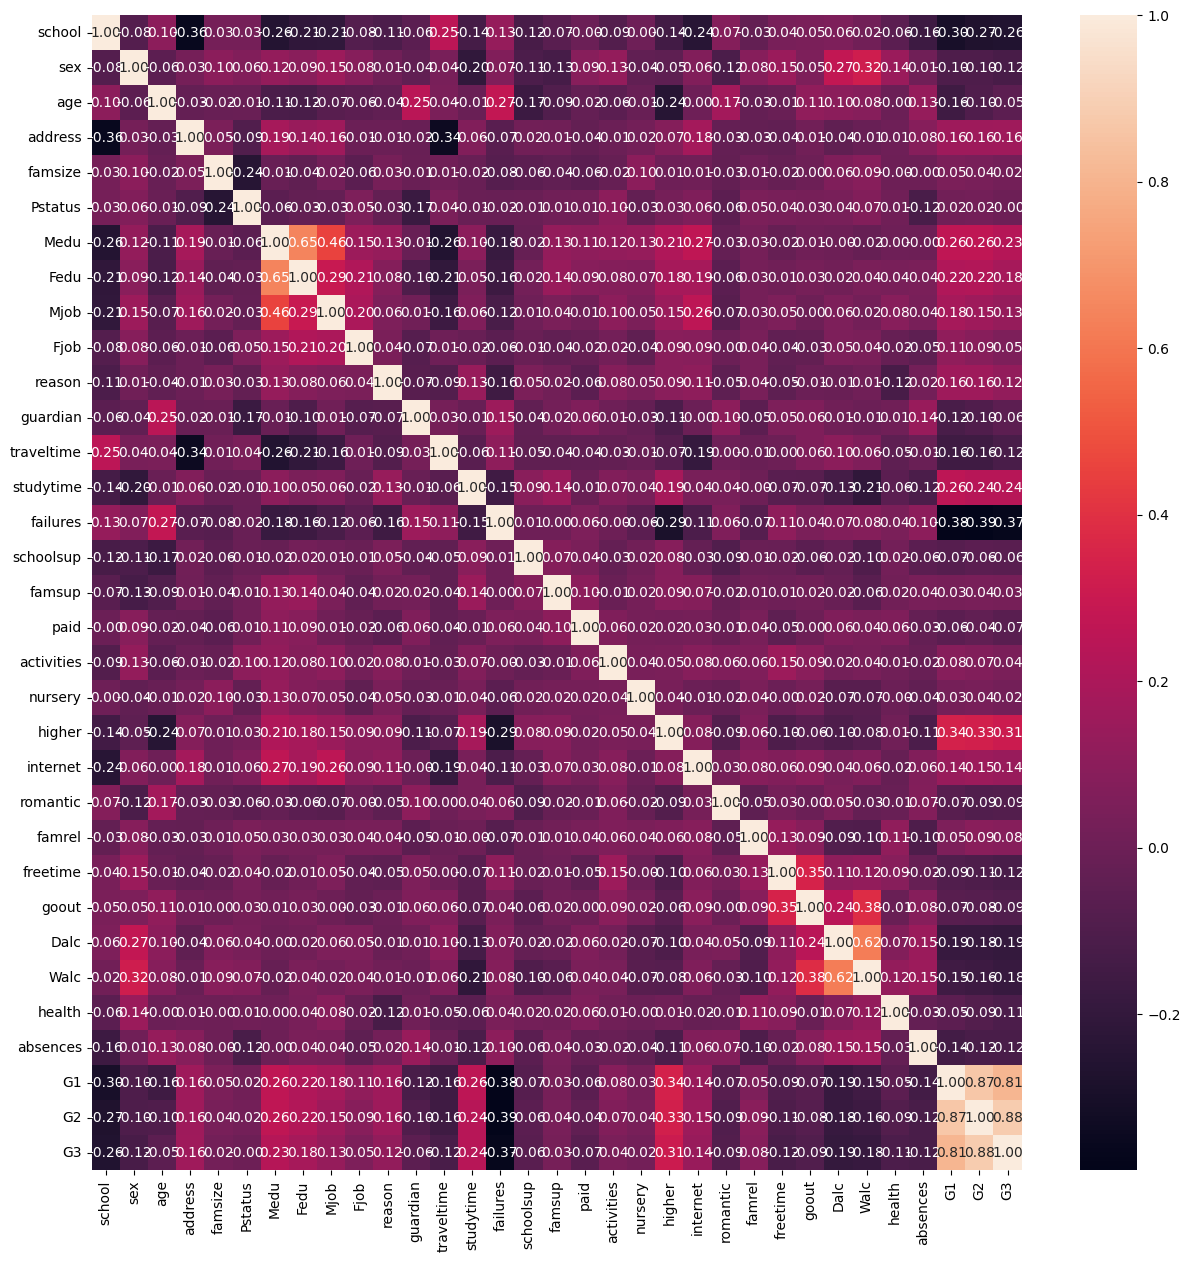

In [112]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(numeric_only=True),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

In [113]:
data['alc'] = data['Dalc'] + data["Walc"]

In [114]:
data = data.drop(columns=['G1', 'G2', 'Dalc', 'Walc'])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 [Text(0, 0.5, 'school'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'age'),
  Text(0, 3.5, 'address'),
  Text(0, 4.5, 'famsize'),
  Text(0, 5.5, 'Pstatus'),
  Text(0, 6.5, 'Medu'),
  Text(0, 7.5, 'Fedu'),
  Text(0, 8.5, 'Mjob'),
  Text(0, 9.5, 'Fjob'),
  Text(0, 10.5, 'reason'),
  Text(0, 11.5, 'guardian'),
  Text(0, 12.5, 'traveltime'),
  Text(0, 13.5, 'studytime'),
  Text(0, 14.5, 'failures'),
  Text(0, 15.5, 'schoolsup'),
  Text(0, 16.5, 'famsup'),
  Text(0, 17.5, 'paid'),
  Text(0, 18.5, 'activities'),
  Text(0, 19.5, 'nursery'),
  Text(0, 20.5, 'higher'),
  Text(0, 21.5, 'internet'),
  Text(0, 22.5, 'romantic'),
  Text(0, 23.5, 'famrel'),
  Text(0, 24.5, 'freetime'),
  Text(0, 25.5, 'goout'),
  Text(0, 26.5, 'health'),
  Text(0, 27.5, 'absences'),
  Text(0, 28.5, 'G3'),
  Text(0, 29

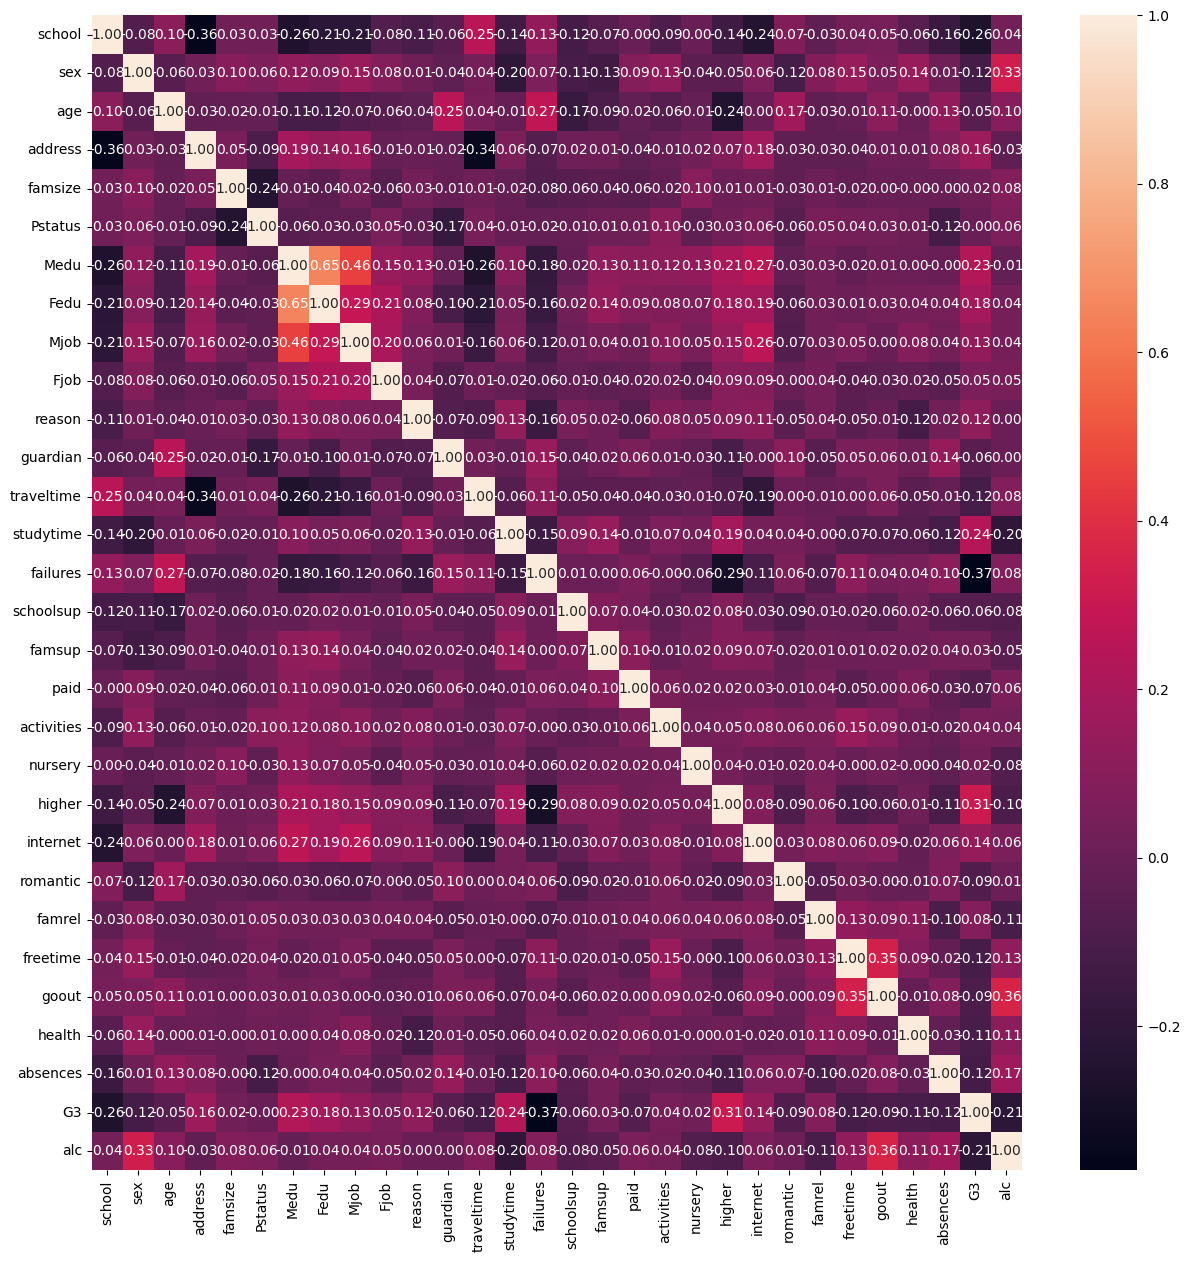

In [115]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(numeric_only=True),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

# Обучение моделей

Ниже представлены формулы подсчета ошибок, которые использовались в оценке обученных моделей.

$ MSE = \dfrac{1}{N} \sum_{i=1}^{N} (y_{i}^{(true)} - y_{i}^{(pred)}) ^ 2 $

$ Accuracy = \dfrac{TP + RN}{TP + FP + TN + FP} $

## Линейные модели

In [116]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['G3']), data['G3'], test_size=0.2, random_state=42)

In [117]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

drop_cols = ['Medu', 'school', 'traveltime', 'famsize']

models = [LinearRegression(), Ridge(), Lasso()]

for model in models:
    model.fit(X_train.drop(columns=drop_cols), y_train)

    y_pred = np.round(model.predict(X_test.drop(columns=drop_cols)))

    print(str(model), mean_squared_error(y_test, y_pred), accuracy_score(y_test, y_pred))


LinearRegression() 0.5769230769230769 0.5153846153846153
Ridge() 0.5769230769230769 0.5153846153846153
Lasso() 0.7384615384615385 0.5153846153846153


In [118]:
from sklearn.model_selection import GridSearchCV

model = Ridge(random_state=42)

parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5]}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')

grid_search.fit(X_train.drop(columns=drop_cols), y_train)

y_pred = np.round(grid_search.best_estimator_.predict(X_test.drop(columns=drop_cols)))

mean_squared_error(y_test, y_pred), accuracy_score(y_test, y_pred)

(0.5615384615384615, 0.5307692307692308)

In [119]:
def mean_data(x, y):
    d = {}
    for i in range(len(x)):
        if x[i] not in d:
            d[x[i]] = []
        d[x[i]].append(y[i])
    return list(d.keys()), [sum(d[key])/len(d[key]) for key in d.keys()]

In [120]:
model = Lasso(random_state=42)

parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5]}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')

grid_search.fit(X_train.drop(columns=drop_cols), y_train)

y_pred = np.round(grid_search.best_estimator_.predict(X_test.drop(columns=drop_cols)))

mean_squared_error(y_test, y_pred), accuracy_score(y_test, y_pred)

(0.5307692307692308, 0.5615384615384615)

In [121]:
lasso_reg = grid_search.best_estimator_

for i in np.argsort(np.abs(lasso_reg.coef_)):
    print(i, lasso_reg.coef_[i], X_train.drop(columns=drop_cols).columns[i])

0 -0.0 sex
15 -0.0 nursery
14 0.0 activities
13 -0.0 paid
8 0.0 guardian
6 -0.0 Fjob
12 0.0 famsup
3 0.0 Pstatus
21 -0.001404911955747013 goout
23 -0.009681569405198967 absences
19 0.012853675675424133 famrel
20 -0.014991926110503697 freetime
7 0.030354777246149465 reason
5 0.03092767653805417 Mjob
22 -0.039076076993141313 health
1 0.05319172364446449 age
24 -0.06103482525023734 alc
4 0.07348302394815324 Fedu
17 0.0935698662712992 internet
18 -0.09588438843223879 romantic
9 0.0994723199098751 studytime
2 0.21365046462630824 address
11 -0.21876718340056997 schoolsup
10 -0.3518537883258844 failures
16 0.3887715093298818 higher


## Decision Tree

In [122]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}, ACC: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}, Recall: {recall_score(y_test, y_pred, average='macro')}')

MSE: 0.8923076923076924, ACC: 0.47692307692307695
Precision: 0.2816635397123202, Recall: 0.2922633210757805


In [123]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}, ACC: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}, Recall: {recall_score(y_test, y_pred, average='macro')}')

MSE: 0.7846153846153846, ACC: 0.5307692307692308
Precision: 0.32641025641025634, Recall: 0.3448698536303988


In [124]:
model = DecisionTreeRegressor(random_state=42)

parameters = { 'max_depth': [None, 1, 5, 10, 20],
             'max_features': [None, 'sqrt', 'log2']}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')

grid_search.fit(X_train.drop(columns=drop_cols), y_train)

y_pred = np.round(grid_search.best_estimator_.predict(X_test.drop(columns=drop_cols)))

print(f'MSE: {mean_squared_error(y_test, y_pred)}, ACC: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}, Recall: {recall_score(y_test, y_pred, average='macro')}')

MSE: 0.7384615384615385, ACC: 0.5153846153846153
Precision: 0.10307692307692307, Recall: 0.2


/Users/nikitaosovskiy/code/flood_pred/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [125]:
model = DecisionTreeClassifier(random_state=42)

parameters = { 'max_depth': [None, 1, 5, 10, 20],
             'max_features': [None, 'sqrt', 'log2']}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')

grid_search.fit(X_train.drop(columns=drop_cols), y_train)

y_pred = np.round(grid_search.best_estimator_.predict(X_test.drop(columns=drop_cols)))

print(f'MSE: {mean_squared_error(y_test, y_pred)}, ACC: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}, Recall: {recall_score(y_test, y_pred, average='macro')}')

MSE: 0.7846153846153846, ACC: 0.5
Precision: 0.20841784989858012, Recall: 0.236275146009085


/Users/nikitaosovskiy/code/flood_pred/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [126]:
grid_search.best_params_

{'max_depth': 5, 'max_features': 'log2'}

[Text(0.5306603773584906, 0.9166666666666666, 'x[5] <= 0.5\ngini = 0.646\nsamples = 516\nvalue = [14, 42, 239, 184, 37]'),
 Text(0.2971698113207547, 0.75, 'x[0] <= 0.5\ngini = 0.58\nsamples = 109\nvalue = [4, 10, 65, 25, 5]'),
 Text(0.1509433962264151, 0.5833333333333334, 'x[9] <= 2.5\ngini = 0.625\nsamples = 78\nvalue = [3, 7, 41, 23, 4]'),
 Text(0.07547169811320754, 0.4166666666666667, 'x[1] <= 18.5\ngini = 0.579\nsamples = 61\nvalue = [3, 6, 36, 15, 1]'),
 Text(0.03773584905660377, 0.25, 'x[21] <= 3.5\ngini = 0.551\nsamples = 56\nvalue = [1, 5, 34, 15, 1]'),
 Text(0.018867924528301886, 0.08333333333333333, 'gini = 0.632\nsamples = 38\nvalue = [1, 5, 19, 12, 1]'),
 Text(0.05660377358490566, 0.08333333333333333, 'gini = 0.278\nsamples = 18\nvalue = [0, 0, 15, 3, 0]'),
 Text(0.11320754716981132, 0.25, 'x[10] <= 0.5\ngini = 0.64\nsamples = 5\nvalue = [2, 1, 2, 0, 0]'),
 Text(0.09433962264150944, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(0.1320754716

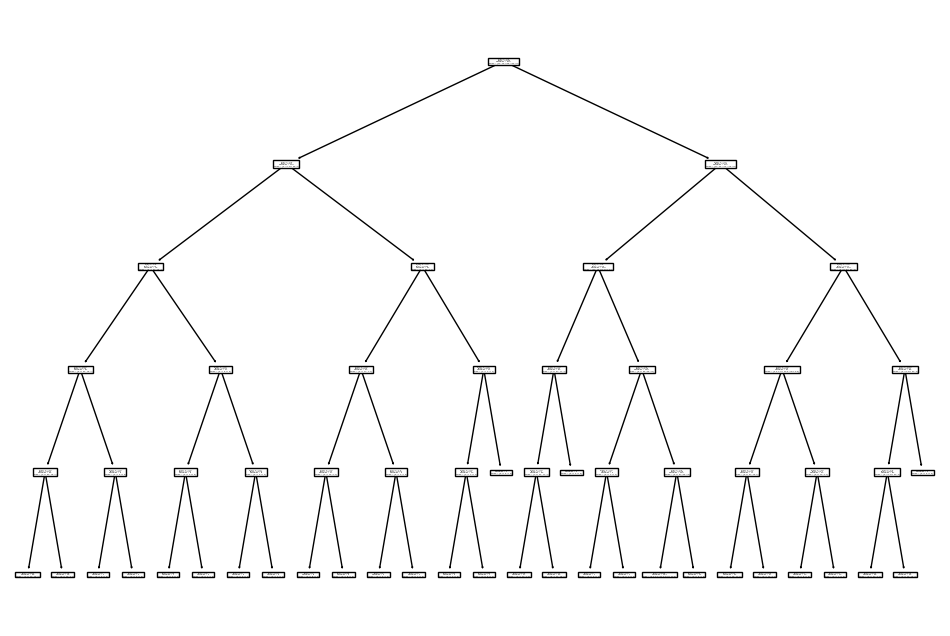

In [127]:
from sklearn import tree

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

tree.plot_tree(grid_search.best_estimator_, ax=ax)

## Random Forest

In [128]:
from sklearn.ensemble import RandomForestRegressor

drop_cols = ["alc", 'traveltime', 'paid']

forest_reg = RandomForestRegressor(random_state=42).fit(X_train.drop(columns=drop_cols), y_train)

y_pred = np.round(forest_reg.predict(X_test.drop(columns=drop_cols)))

print(f'MSE: {mean_squared_error(y_test, y_pred)}, ACC: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}, Recall: {recall_score(y_test, y_pred, average='macro')}')

MSE: 0.47692307692307695, ACC: 0.5461538461538461
Precision: 0.25489367441442246, Recall: 0.2858966039368375


/Users/nikitaosovskiy/code/flood_pred/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [129]:
from sklearn.ensemble import RandomForestClassifier

drop_cols = ["alc", 'traveltime', 'paid']

forest_reg = RandomForestClassifier(random_state=42).fit(X_train.drop(columns=drop_cols), y_train)

y_pred = np.round(forest_reg.predict(X_test.drop(columns=drop_cols)))

print(f'MSE: {mean_squared_error(y_test, y_pred)}, ACC: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}, Recall: {recall_score(y_test, y_pred, average='macro')}')

MSE: 0.49230769230769234, ACC: 0.6230769230769231
Precision: 0.2465079365079365, Recall: 0.2772225827384815


/Users/nikitaosovskiy/code/flood_pred/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [130]:
model = RandomForestRegressor(random_state=42)

parameters = {'n_estimators': [10, 50, 100, 300], 
             'max_depth': [None, 5, 10, 20, 30],
             'max_features': [None, 'sqrt', 'log2']}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')

grid_search.fit(X_train.drop(columns=drop_cols), y_train)

y_pred = np.round(grid_search.best_estimator_.predict(X_test.drop(columns=drop_cols)))

print(f'MSE: {mean_squared_error(y_test, y_pred)}, ACC: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}, Recall: {recall_score(y_test, y_pred, average='macro')}')

MSE: 0.5, ACC: 0.5461538461538461
Precision: 0.22784876140808344, Recall: 0.2528228423101882


/Users/nikitaosovskiy/code/flood_pred/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [131]:
model = RandomForestClassifier(random_state=42)

parameters = {'n_estimators': [10, 50, 100, 300], 
             'max_depth': [None, 5, 10, 20, 30],
             'max_features': [None, 'sqrt', 'log2']}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')

grid_search.fit(X_train.drop(columns=drop_cols), y_train)

y_pred = np.round(grid_search.best_estimator_.predict(X_test.drop(columns=drop_cols)))

print(f'MSE: {mean_squared_error(y_test, y_pred)}, ACC: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}, Recall: {recall_score(y_test, y_pred, average='macro')}')

MSE: 0.6307692307692307, ACC: 0.5769230769230769
Precision: 0.3251993620414673, Recall: 0.3866753190568894


/Users/nikitaosovskiy/code/flood_pred/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [132]:
grid_search.best_params_

{'max_depth': None, 'max_features': None, 'n_estimators': 100}

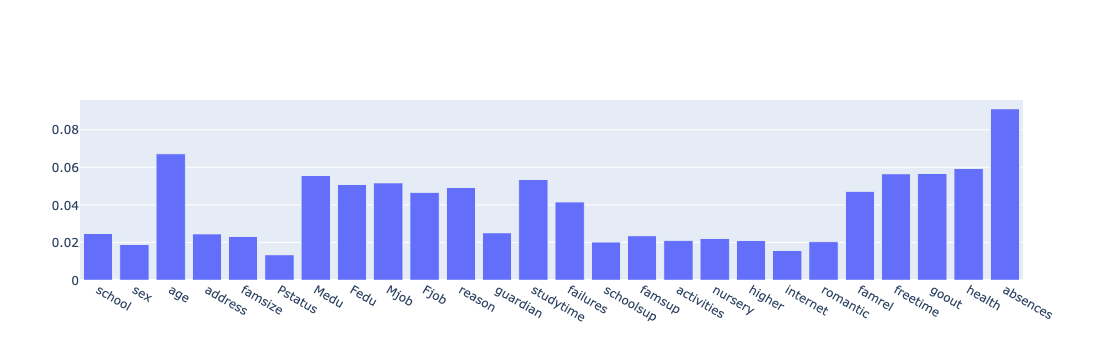

In [133]:
importances = grid_search.best_estimator_.feature_importances_

fig = go.Figure([go.Bar(x=X_train.drop(columns=drop_cols).columns, y=importances)])
fig.show()

# Boosting

In [134]:
from xgboost import XGBRegressor

boost_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

boost_reg.fit(X_train, y_train)

y_pred = np.round(boost_reg.predict(X_test))

print(f'MSE: {mean_squared_error(y_test, y_pred)}, ACC: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}, Recall: {recall_score(y_test, y_pred, average='macro')}')

MSE: 0.6307692307692307, ACC: 0.5307692307692308
Precision: 0.2566120671781049, Recall: 0.273112697382652


In [135]:
from xgboost import XGBClassifier

boost_reg = XGBClassifier(objective='reg:squarederror', random_state=42)

boost_reg.fit(X_train, y_train - min(y_train))

y_pred = np.round(boost_reg.predict(X_test))

print(f'MSE: {mean_squared_error(y_test, y_pred + min(y_train))}, ACC: {accuracy_score(y_test, y_pred + min(y_train))}')
print(f'Precision: {precision_score(y_test, y_pred + min(y_train), average='macro')}, Recall: {recall_score(y_test, y_pred + min(y_train), average='macro')}')

MSE: 0.5615384615384615, ACC: 0.6461538461538462
Precision: 0.49356060606060603, Recall: 0.5086235489220564


In [136]:
model = XGBRegressor(objective='reg:squarederror', random_state=42)

parameters = {'n_estimators': [10, 50, 100, 300], 
             'max_depth': [None, 5, 10, 20, 30]}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')

grid_search.fit(X_train.drop(columns=drop_cols), y_train)

y_pred = np.round(grid_search.best_estimator_.predict(X_test.drop(columns=drop_cols)))


print(f'MSE: {mean_squared_error(y_test, y_pred)}, ACC: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}, Recall: {recall_score(y_test, y_pred, average='macro')}')

MSE: 0.5538461538461539, ACC: 0.5384615384615384
Precision: 0.4495901639344263, Recall: 0.3772009517629245


/Users/nikitaosovskiy/code/flood_pred/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [137]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 10}

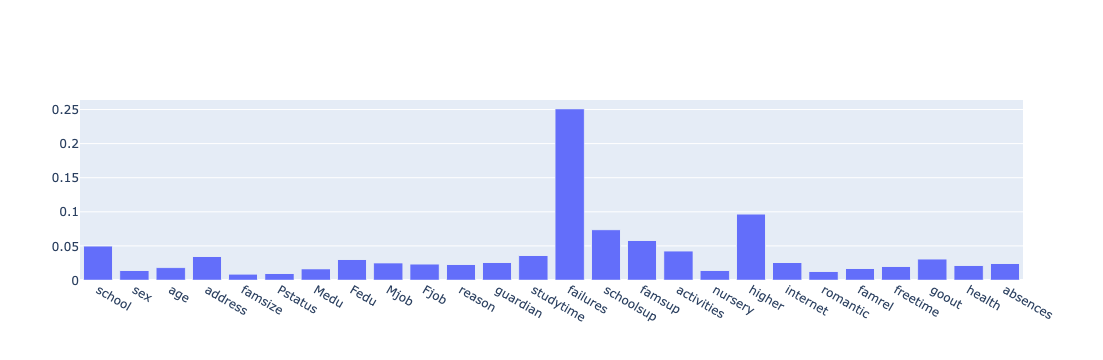

In [138]:
importances = grid_search.best_estimator_.feature_importances_

fig = go.Figure([go.Bar(x=X_train.drop(columns=drop_cols).columns, y=importances)])
fig.show()

## KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

parameters = {'n_neighbors': [3, 5, 10, 20]}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')

grid_search.fit(X_train.drop(columns=drop_cols), y_train)

y_pred = np.round(grid_search.best_estimator_.predict(X_test.drop(columns=drop_cols)))


print(f'MSE: {mean_squared_error(y_test, y_pred)}, ACC: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}, Recall: {recall_score(y_test, y_pred, average='macro')}')

MSE: 0.6, ACC: 0.5384615384615384
Precision: 0.2138519924098672, Recall: 0.24711226476314083


/Users/nikitaosovskiy/code/flood_pred/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

